# Mini-Project (AI-AUG)

## Twitter User Gender Classification 

### Neural Network Modelling & Prediction

We are provided with only the profiles of the users of twitter and we need to predict the gender of the user(*male, female* or *brand*). The dataset used for training is a dataset provided from Kaggle and the link is [here](https://www.kaggle.com/crowdflower/twitter-user-gender-classification).

*The dataset contains the following fields:* 
- **unitid**: a unique id for user
- **golden**: whether the user was included in the gold standard for the model; TRUE or FALSE
- **unitstate**: state of the observation; one of finalized (for contributor-judged) or golden (for gold standard observations)
- **trustedjudgments**: number of trusted judgments (int); always 3 for non-golden, and what may be a unique id for gold standard observations
- **lastjudgment_at**: date and time of last contributor judgment; blank for gold standard observations
- **gender**: one of male, female, or brand (for non-human profiles)
- **gender:confidence**: a float representing confidence in the provided gender
- **profile_yn**: "no" here seems to mean that the profile was meant to be part of the dataset but was not available when contributors went to judge it
- **profile_yn:confidence**: confidence in the existence/non-existence of the profile
- **created**: date and time when the profile was created
- **description**: the user's profile description
- **fav_number**: number of tweets the user has favorited
- **gender_gold**: if the profile is golden, what is the gender?
- **link_color**: the link color on the profile, as a hex value
- **name**: the user's name
- **profileyngold**: whether the profile y/n value is golden
- **profileimage**: a link to the profile image
- **retweet_count**: number of times the user has retweeted (or possibly, been retweeted)
- **sidebar_color**: color of the profile sidebar, as a hex value
- **text**: text of a random one of the user's tweets
- **tweet_coord**: if the user has location turned on, the coordinates as a string with the format "[latitude, longitude]"
- **tweet_count**: number of tweets that the user has posted
- **tweet_created**: when the random tweet (in the text column) was created
- **tweet_id**: the tweet id of the random tweet
- **tweet_location**: location of the tweet; seems to not be particularly normalized
- **user_timezone**: the timezone of the user

*The processes we need to perform are(bold ones are preformed in this .ipynb file):*
1) Perform the required cleaning<br>
2) Perform EDA to understand data better<br>
3) **Perform Feature selection/engineering/scaling (if required)**<br>
4) **Build a neural network using Sklearn and/or tensorflow**<br>

**The column "gender" will be the target feature in the dataset provided.**

Data Analysis of this dataset is present in the **Data Cleaning & Exploratory Data Analysis.ipynb** & **Test Analysis.ipynb** file.<br>
After performing this Data Analysis, I have come up with some new features and some of the old features that could help us predict our target column more accurately.

*Features present in the Analysised dataset are:*
- **gender**: one of male, female, or brand (for non-human profiles)
- **description**: the user's profile description
- **fav_number**: number of tweets the user has favorited
- **tweet**: text of a random one of the user's tweets
- **tweet_count**: number of tweets that the user has posted
- **desc_len**: length of the description
- **tweet_len**: length of the tweet
- **RBG_link_color**: tuple of RGB value of link_color
- **RBG_sidebar_color**: tuple of RGB value of sidebar_color
- **link_color**: color of the link of the profile(Gaussian Representation)
- **sidebar_color**: color of the sidebar of the profile(Gaussian Representation)
- **tweet_words**: list of processed words of tweet
- **desc_words**: list of processed words of description
- **Male_T_Score**: tweet score w.r.t Male
- **Female_T_Score**: tweet score w.r.t Female
- **Brand_T_Score**: tweet score w.r.t Brand
- **Male_D_Score**: desciption score w.r.t Male
- **Female_D_Score**: desciption score w.r.t Female
- **Brand_D_Score**: desciption score w.r.t Brand

**Now we need to predict "gender" using all these features**

Importing required Libraries

In [242]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Setting primary settings

In [2]:
%matplotlib inline
sns.set_style('darkgrid')
pd.options.display.max_columns = 26
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)

Importing the dataset

In [4]:
gender_df = pd.read_csv('final.csv')
gender_df.drop(columns=['Unnamed: 0'], inplace=True)
gender_df.head(8)

,gender,description,fav_number,tweet,tweet_count,desc_len,tweet_len,RBG_link_color,RBG_sidebar_color,link_color,sidebar_color,tweet_words,desc_words,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score,Brand_D_Score
0,male,i sing my own rhythm.,0,Robbie E Responds To Critics After Win Against...,110964,21,109,"(8, 194, 194)","(255, 255, 255)",0.578431,1.000000,"['robbi', 'e', 'respond', 'critic', 'win', 'ed...","['sing', 'rhythm']",0.011182,0.009599,0.010630,0.001268,0.002638,0.000330
1,male,I'm the author of novels filled with family dr...,68,ÛÏIt felt like they were my friends and I was...,7471,62,139,"(0, 132, 180)","(192, 222, 237)",0.435294,0.855882,"['ûïit', 'felt', 'like', 'friend', 'live', 'st...","['author', 'novel', 'fill', 'famili', 'drama',...",0.051138,0.058385,0.046946,0.018237,0.018495,0.010452
2,male,louis whining and squealing and all,7696,i absolutely adore when louis starts the songs...,5617,35,80,"(171, 184, 194)","(192, 222, 237)",0.718627,0.855882,"['absolut', 'ador', 'loui', 'start', 'song', '...","['loui', 'whine', 'squeal']",0.043089,0.042259,0.020020,0.002076,0.001545,0.001330
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,Hi @JordanSpieth - Looking at the url - do you...,1693,146,138,"(0, 132, 180)","(192, 222, 237)",0.435294,0.855882,"['hi', 'jordanspieth', 'look', 'url', 'use', '...","['mobil', 'guy', 'er', 'shazam', 'googl', 'kle...",0.038179,0.036107,0.030881,0.043338,0.011477,0.018466
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,Watching Neighbours on Sky+ catching up with t...,31462,160,95,"(59, 148, 217)","(0, 0, 0)",0.560784,0.000000,"['watch', 'neighbour', 'sky', 'catch', 'neighb...","['ricki', 'wilson', 'best', 'frontman', 'kaise...",0.053490,0.119514,0.018620,0.039516,0.044602,0.044812
5,female,you don't know me.,3901,"Ive seen people on the train with lamps, chair...",20036,18,81,"(245, 171, 181)","(0, 0, 0)",0.752941,0.000000,"['ive', 'seen', 'peopl', 'train', 'lamp', 'cha...",['know'],0.022177,0.025404,0.012757,0.007470,0.007651,0.006157
6,brand,"A global marketplace for images, videos and mu...",4122,@BpackEngineer Thank you for your patience whi...,13354,128,75,"(41, 138, 174)","(0, 0, 0)",0.481373,0.000000,"['bpackengin', 'thank', 'patienc', 'take', 'ca...","['global', 'marketplac', 'imag', 'video', 'mus...",0.022141,0.028134,0.020254,0.049787,0.038005,0.086690
7,male,The secret of getting ahead is getting started.,80,Gala Bingo clubs bought for å£241m: The UK's l...,112117,47,136,"(0, 0, 255)","(192, 222, 237)",0.250000,0.855882,"['gala', 'bingo', 'club', 'bought', 'å', 'uk',...","['secret', 'get', 'ahead', 'get', 'start']",0.035344,0.025226,0.064095,0.024163,0.020922,0.030082


In [21]:
gender_df['gender'].value_counts()

female    6685
male      6173
brand     5937
Name: gender, dtype: int64

Selecting Independent Features and Dependent Feature

In [125]:
#Independent Features
ind_feat_df = gender_df[['fav_number', 'tweet_count', 'desc_len', 'tweet_len',
                         'link_color', 'sidebar_color', 'Male_T_Score', 'Female_T_Score', 
                         'Brand_T_Score', 'Male_D_Score', 'Female_D_Score', 'Brand_D_Score']]

In [10]:
ind_feat_df.head()

,fav_number,tweet_count,desc_len,tweet_len,link_color,sidebar_color,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score,Brand_D_Score
0,0,110964,21,109,0.578431,1.000000,0.011182,0.009599,0.010630,0.001268,0.002638,0.000330
1,68,7471,62,139,0.435294,0.855882,0.051138,0.058385,0.046946,0.018237,0.018495,0.010452
2,7696,5617,35,80,0.718627,0.855882,0.043089,0.042259,0.020020,0.002076,0.001545,0.001330
3,202,1693,146,138,0.435294,0.855882,0.038179,0.036107,0.030881,0.043338,0.011477,0.018466
4,37318,31462,160,95,0.560784,0.000000,0.053490,0.119514,0.018620,0.039516,0.044602,0.044812


In [13]:
#Dependent Features
dep_feat_df = gender_df[['gender']]

In [14]:
dep_feat_df.head()

,gender
0,male
1,male
2,male
3,male
4,female


Convert the dependent feature into OneHot vector using one-hot encoding

In [17]:
dep_feat_df = pd.get_dummies(dep_feat_df, prefix='gender')
dep_feat_df.head()

,gender_brand,gender_female,gender_male
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0


Dividing the dataset into train set and test set using train_test_split

In [19]:
#Converting all the dataframes into numpy arrays
X = ind_feat_df.values
y = dep_feat_df.values
print('X:' ,type(X), X.shape)
print('y:' ,type(y), y.shape)

X: <class 'numpy.ndarray'> (18795, 12)
y: <class 'numpy.ndarray'> (18795, 3)


In [20]:
#Splitting into train_set and test_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=23)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (15975, 12)
y_train.shape:  (15975, 3)
X_test.shape:  (2820, 12)
y_test.shape:  (2820, 3)


Standardizing our train_set and test_set

In [22]:
#Making an object of StandardScaler
scaler = StandardScaler() 
#Fitting the scaler on X_train
scaler.fit(X_train)

StandardScaler()

In [23]:
#Transforming the training_set and test_set
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

Scaling and transforming of our dataset is done. *Now lets build the architecture of the Artificial Neural Network*

In [76]:
#Building an ANN with relu as activation function
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
#Showing model summary
model.summary()

In [78]:
#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
#Fitting the model
history = model.fit(scaled_X_train, y_train,validation_data = (scaled_X_test, y_test), epochs=500, batch_size=64)

Train on 15975 samples, validate on 2820 samples
Epoch 1/500
15975/15975 [==============================] - 0s 19us/step - loss: 1.0523 - accuracy: 0.4417 - val_loss: 0.9409 - val_accuracy: 0.5369
Epoch 2/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.9048 - accuracy: 0.5487 - val_loss: 0.8760 - val_accuracy: 0.5759
Epoch 3/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8673 - accuracy: 0.5733 - val_loss: 0.8538 - val_accuracy: 0.5848
Epoch 4/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8498 - accuracy: 0.5897 - val_loss: 0.8406 - val_accuracy: 0.5894
Epoch 5/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8379 - accuracy: 0.5986 - val_loss: 0.8319 - val_accuracy: 0.6007
Epoch 6/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8287 - accuracy: 0.6093 - val_loss: 0.8253 - val_accuracy: 0.6067
Epoch 7/500
15975/15975 [==============================] - 0s 1

15975/15975 [==============================] - 0s 17us/step - loss: 0.7179 - accuracy: 0.6881 - val_loss: 0.7357 - val_accuracy: 0.6837
Epoch 56/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7175 - accuracy: 0.6888 - val_loss: 0.7364 - val_accuracy: 0.6819
Epoch 57/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.7174 - accuracy: 0.6863 - val_loss: 0.7374 - val_accuracy: 0.6816
Epoch 58/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.7171 - accuracy: 0.6877 - val_loss: 0.7354 - val_accuracy: 0.6812
Epoch 59/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.7167 - accuracy: 0.6875 - val_loss: 0.7350 - val_accuracy: 0.6837
Epoch 60/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.7166 - accuracy: 0.6873 - val_loss: 0.7351 - val_accuracy: 0.6851
Epoch 61/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.7160 - accuracy: 0.6871 - val_loss: 

15975/15975 [==============================] - 0s 13us/step - loss: 0.7065 - accuracy: 0.6931 - val_loss: 0.7240 - val_accuracy: 0.6926
Epoch 111/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7061 - accuracy: 0.6931 - val_loss: 0.7217 - val_accuracy: 0.6887
Epoch 112/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7056 - accuracy: 0.6945 - val_loss: 0.7240 - val_accuracy: 0.6869
Epoch 113/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7062 - accuracy: 0.6930 - val_loss: 0.7226 - val_accuracy: 0.6901
Epoch 114/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.7061 - accuracy: 0.6930 - val_loss: 0.7223 - val_accuracy: 0.6872
Epoch 115/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7054 - accuracy: 0.6938 - val_loss: 0.7212 - val_accuracy: 0.6883
Epoch 116/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7054 - accuracy: 0.6938 - val_

Epoch 165/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6995 - accuracy: 0.6962 - val_loss: 0.7143 - val_accuracy: 0.6918
Epoch 166/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6997 - accuracy: 0.6958 - val_loss: 0.7142 - val_accuracy: 0.6918
Epoch 167/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6993 - accuracy: 0.6970 - val_loss: 0.7136 - val_accuracy: 0.6950
Epoch 168/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6991 - accuracy: 0.6979 - val_loss: 0.7150 - val_accuracy: 0.6926
Epoch 169/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6988 - accuracy: 0.6960 - val_loss: 0.7188 - val_accuracy: 0.6936
Epoch 170/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6986 - accuracy: 0.6983 - val_loss: 0.7133 - val_accuracy: 0.6869
Epoch 171/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6990 - accuracy:

15975/15975 [==============================] - 0s 11us/step - loss: 0.6952 - accuracy: 0.6985 - val_loss: 0.7102 - val_accuracy: 0.6972
Epoch 220/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6951 - accuracy: 0.7002 - val_loss: 0.7099 - val_accuracy: 0.6943
Epoch 221/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6947 - accuracy: 0.6980 - val_loss: 0.7135 - val_accuracy: 0.6943
Epoch 222/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6954 - accuracy: 0.6977 - val_loss: 0.7104 - val_accuracy: 0.6986
Epoch 223/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6948 - accuracy: 0.6985 - val_loss: 0.7105 - val_accuracy: 0.6940
Epoch 224/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6951 - accuracy: 0.6978 - val_loss: 0.7116 - val_accuracy: 0.6961
Epoch 225/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6949 - accuracy: 0.6966 - val_

Epoch 274/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6926 - accuracy: 0.7007 - val_loss: 0.7089 - val_accuracy: 0.6943
Epoch 275/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6930 - accuracy: 0.6985 - val_loss: 0.7075 - val_accuracy: 0.6982
Epoch 276/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6931 - accuracy: 0.6990 - val_loss: 0.7097 - val_accuracy: 0.6996
Epoch 277/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6928 - accuracy: 0.6993 - val_loss: 0.7094 - val_accuracy: 0.6979
Epoch 278/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6923 - accuracy: 0.7004 - val_loss: 0.7091 - val_accuracy: 0.6961
Epoch 279/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6929 - accuracy: 0.6993 - val_loss: 0.7077 - val_accuracy: 0.6996
Epoch 280/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6927 - accuracy:

15975/15975 [==============================] - 0s 12us/step - loss: 0.6924 - accuracy: 0.7002 - val_loss: 0.7082 - val_accuracy: 0.7011
Epoch 329/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6917 - accuracy: 0.7014 - val_loss: 0.7087 - val_accuracy: 0.6926
Epoch 330/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6914 - accuracy: 0.6987 - val_loss: 0.7080 - val_accuracy: 0.6957
Epoch 331/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6916 - accuracy: 0.6996 - val_loss: 0.7081 - val_accuracy: 0.6950
Epoch 332/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6918 - accuracy: 0.6989 - val_loss: 0.7072 - val_accuracy: 0.6965
Epoch 333/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6916 - accuracy: 0.7005 - val_loss: 0.7072 - val_accuracy: 0.7000
Epoch 334/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6917 - accuracy: 0.7001 - val_

Epoch 383/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6912 - accuracy: 0.6997 - val_loss: 0.7073 - val_accuracy: 0.6968
Epoch 384/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6914 - accuracy: 0.6983 - val_loss: 0.7074 - val_accuracy: 0.6996
Epoch 385/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6906 - accuracy: 0.6998 - val_loss: 0.7067 - val_accuracy: 0.6989
Epoch 386/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.6916 - accuracy: 0.7007 - val_loss: 0.7073 - val_accuracy: 0.7007
Epoch 387/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6910 - accuracy: 0.6998 - val_loss: 0.7077 - val_accuracy: 0.6982
Epoch 388/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6915 - accuracy: 0.6997 - val_loss: 0.7083 - val_accuracy: 0.6947
Epoch 389/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6909 - accuracy:

15975/15975 [==============================] - 0s 13us/step - loss: 0.6904 - accuracy: 0.6987 - val_loss: 0.7061 - val_accuracy: 0.6979
Epoch 438/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.6900 - accuracy: 0.6982 - val_loss: 0.7072 - val_accuracy: 0.6954
Epoch 439/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.6903 - accuracy: 0.6975 - val_loss: 0.7054 - val_accuracy: 0.6982
Epoch 440/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6897 - accuracy: 0.6995 - val_loss: 0.7082 - val_accuracy: 0.6982
Epoch 441/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6905 - accuracy: 0.6995 - val_loss: 0.7062 - val_accuracy: 0.6989
Epoch 442/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6898 - accuracy: 0.6996 - val_loss: 0.7089 - val_accuracy: 0.6996
Epoch 443/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6897 - accuracy: 0.7007 - val_

15975/15975 [==============================] - 0s 12us/step - loss: 0.6901 - accuracy: 0.6998 - val_loss: 0.7063 - val_accuracy: 0.6996
Epoch 492/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.6895 - accuracy: 0.6999 - val_loss: 0.7076 - val_accuracy: 0.6982
Epoch 493/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.6897 - accuracy: 0.7007 - val_loss: 0.7068 - val_accuracy: 0.7014
Epoch 494/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6892 - accuracy: 0.7012 - val_loss: 0.7075 - val_accuracy: 0.7014
Epoch 495/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6894 - accuracy: 0.7007 - val_loss: 0.7069 - val_accuracy: 0.6982
Epoch 496/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6892 - accuracy: 0.7021 - val_loss: 0.7055 - val_accuracy: 0.7025
Epoch 497/500
15975/15975 [==============================] - 0s 11us/step - loss: 0.6892 - accuracy: 0.7008 - val_

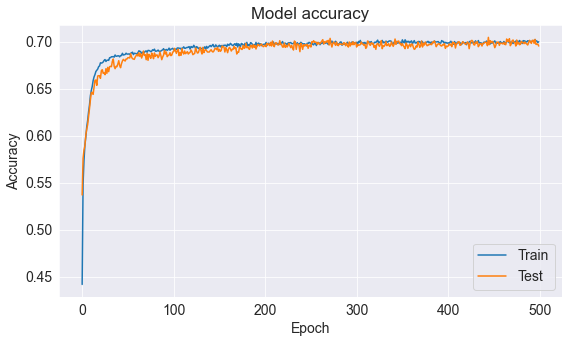

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

**From the above model and features we got a accuracy of 70% in training set and accuracy of 69.5% on test set/validation set.**

Now let's try some more feature engineering and see if we can increase our accuracy

In [109]:
ind_feat_df.head()

,fav_number,tweet_count,desc_len,tweet_len,link_color,sidebar_color,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score,Brand_D_Score
0,0,110964,21,109,0.578431,1.000000,0.011182,0.009599,0.010630,0.001268,0.002638,0.000330
1,68,7471,62,139,0.435294,0.855882,0.051138,0.058385,0.046946,0.018237,0.018495,0.010452
2,7696,5617,35,80,0.718627,0.855882,0.043089,0.042259,0.020020,0.002076,0.001545,0.001330
3,202,1693,146,138,0.435294,0.855882,0.038179,0.036107,0.030881,0.043338,0.011477,0.018466
4,37318,31462,160,95,0.560784,0.000000,0.053490,0.119514,0.018620,0.039516,0.044602,0.044812


After looking at the values we can say that the values of **link_color**, **sidebar_color**, **Male_T_Score**, **Female_T_Score**, **Brand_T_Score**, **Male_D_Score**, **Female_D_Score** & **Brand_D_Score** have values within the range of 0 to 1 so *they don't require scaling*. So, we are gonna perform scaling on the remaining 4 columns.

In [126]:
#for fav_number column
mu = ind_feat_df.loc[:, 'fav_number'].mean()
std = ind_feat_df.loc[:, 'fav_number'].std()
def standardize(val):
    return (val - mu)/std
ind_feat_df.loc[:, 'fav_number'] = ind_feat_df.loc[:, 'fav_number'].apply(standardize)

In [127]:
#for tweet_count column
mu = ind_feat_df.loc[:, 'tweet_count'].mean()
std = ind_feat_df.loc[:, 'tweet_count'].std()
def standardize(val):
    return (val - mu)/std
ind_feat_df.loc[:, 'tweet_count'] = ind_feat_df.loc[:, 'tweet_count'].apply(standardize)

In [128]:
#for desc_len column
mu = ind_feat_df.loc[:, 'desc_len'].mean()
std = ind_feat_df.loc[:, 'desc_len'].std()
def standardize(val):
    return (val - mu)/std
ind_feat_df.loc[:, 'desc_len'] = ind_feat_df.loc[:, 'desc_len'].apply(standardize)

In [129]:
#for tweet_len column
mu = ind_feat_df.loc[:, 'tweet_len'].mean()
std = ind_feat_df.loc[:, 'tweet_len'].std()
def standardize(val):
    return (val - mu)/std
ind_feat_df.loc[:, 'tweet_len'] = ind_feat_df.loc[:, 'tweet_len'].apply(standardize)

In [130]:
ind_feat_df.sample(5)

,fav_number,tweet_count,desc_len,tweet_len,link_color,sidebar_color,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score,Brand_D_Score
12001,0.070062,-0.285103,0.584672,0.913014,0.543137,0.000000,0.054803,0.065093,0.068574,0.016506,0.016038,0.013184
10959,4.024048,1.162871,-0.829622,1.267468,0.012745,1.000000,0.055504,0.052517,0.032038,0.008783,0.011433,0.005617
12608,-0.339400,-0.321845,1.327176,1.119779,0.731373,1.000000,0.021792,0.019759,0.027316,0.068867,0.097026,0.078519
4641,0.474715,0.192126,-0.776586,0.883476,0.435294,0.855882,0.019488,0.018535,0.021476,0.010805,0.012355,0.009290
13170,-0.263357,-0.213564,-1.218553,0.085954,0.263725,1.000000,0.076719,0.139547,0.037353,0.000000,0.000000,0.000000


In [131]:
X2 = ind_feat_df.values
y = dep_feat_df.values
print('X2:' ,type(X), X2.shape)
print('y:' ,type(y), y.shape)

X2: <class 'numpy.ndarray'> (18795, 12)
y: <class 'numpy.ndarray'> (18795, 3)


In [132]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.15, random_state=23)
print('X2_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X2_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X2_train.shape:  (15975, 12)
y_train.shape:  (15975, 3)
X2_test.shape:  (2820, 12)
y_test.shape:  (2820, 3)


In [148]:
#Model Architecture with sigmoid as activation
model = Sequential()
model.add(Dense(12, input_dim=12, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

#Showing model summary
model.summary()

#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fitting the model
history = model.fit(X2_train, y_train, validation_data = (X2_test, y_test), epochs=500, batch_size=64)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 39        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________
Train on 15975 samples, validate on 2820 samples
Epoch 1/500
15975/15975 [==============================] - 0s 26us/step - loss: 1.1015 - accuracy: 0.3760 - val_loss: 1.0819 - val_accuracy: 0.3890
Epoch 2/500
15975/15975 [==============================] - 0s 14us/step - loss: 1.0742 - accuracy: 0.4047 - val_loss: 1.0662 - val_accuracy: 0.4202
Epoch 3/500
15975/15975 [==============================] - 0s 13us/step - loss: 1.0592 - accuracy: 0.4254 - val_loss: 1.0526 - val_accuracy: 0.4447
Epoch 4/500
15975/15975 

15975/15975 [==============================] - 0s 13us/step - loss: 0.8472 - accuracy: 0.5854 - val_loss: 0.8436 - val_accuracy: 0.5897
Epoch 52/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8464 - accuracy: 0.5871 - val_loss: 0.8434 - val_accuracy: 0.5855
Epoch 53/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8460 - accuracy: 0.5871 - val_loss: 0.8428 - val_accuracy: 0.5872
Epoch 54/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8454 - accuracy: 0.5867 - val_loss: 0.8430 - val_accuracy: 0.5887
Epoch 55/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8448 - accuracy: 0.5874 - val_loss: 0.8414 - val_accuracy: 0.5918
Epoch 56/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8445 - accuracy: 0.5899 - val_loss: 0.8411 - val_accuracy: 0.5879
Epoch 57/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8436 - accuracy: 0.5874 - val_loss: 

15975/15975 [==============================] - 0s 13us/step - loss: 0.8219 - accuracy: 0.6130 - val_loss: 0.8203 - val_accuracy: 0.6145
Epoch 107/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8216 - accuracy: 0.6153 - val_loss: 0.8211 - val_accuracy: 0.6092
Epoch 108/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8210 - accuracy: 0.6165 - val_loss: 0.8193 - val_accuracy: 0.6177
Epoch 109/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.8207 - accuracy: 0.6150 - val_loss: 0.8192 - val_accuracy: 0.6156
Epoch 110/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.8200 - accuracy: 0.6165 - val_loss: 0.8192 - val_accuracy: 0.6184
Epoch 111/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8199 - accuracy: 0.6176 - val_loss: 0.8183 - val_accuracy: 0.6177
Epoch 112/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8193 - accuracy: 0.6177 - val_

15975/15975 [==============================] - 0s 16us/step - loss: 0.8006 - accuracy: 0.6391 - val_loss: 0.8031 - val_accuracy: 0.6376
Epoch 161/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.8003 - accuracy: 0.6386 - val_loss: 0.8016 - val_accuracy: 0.6390
Epoch 162/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7998 - accuracy: 0.6406 - val_loss: 0.8013 - val_accuracy: 0.6379
Epoch 163/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7998 - accuracy: 0.6406 - val_loss: 0.8008 - val_accuracy: 0.6415
Epoch 164/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7995 - accuracy: 0.6407 - val_loss: 0.8004 - val_accuracy: 0.6379
Epoch 165/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7990 - accuracy: 0.6391 - val_loss: 0.8004 - val_accuracy: 0.6362
Epoch 166/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7987 - accuracy: 0.6425 - val_

15975/15975 [==============================] - 0s 13us/step - loss: 0.7855 - accuracy: 0.6563 - val_loss: 0.7908 - val_accuracy: 0.6408
Epoch 215/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7854 - accuracy: 0.6555 - val_loss: 0.7904 - val_accuracy: 0.6440
Epoch 216/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7853 - accuracy: 0.6543 - val_loss: 0.7888 - val_accuracy: 0.6489
Epoch 217/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7849 - accuracy: 0.6563 - val_loss: 0.7892 - val_accuracy: 0.6468
Epoch 218/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7847 - accuracy: 0.6549 - val_loss: 0.7882 - val_accuracy: 0.6514
Epoch 219/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7845 - accuracy: 0.6550 - val_loss: 0.7884 - val_accuracy: 0.6525
Epoch 220/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7844 - accuracy: 0.6557 - val_

Epoch 269/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7760 - accuracy: 0.6628 - val_loss: 0.7823 - val_accuracy: 0.6592
Epoch 270/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7758 - accuracy: 0.6642 - val_loss: 0.7815 - val_accuracy: 0.6571
Epoch 271/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7754 - accuracy: 0.6643 - val_loss: 0.7813 - val_accuracy: 0.6578
Epoch 272/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.7754 - accuracy: 0.6666 - val_loss: 0.7812 - val_accuracy: 0.6546
Epoch 273/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7750 - accuracy: 0.6632 - val_loss: 0.7812 - val_accuracy: 0.6589
Epoch 274/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7751 - accuracy: 0.6637 - val_loss: 0.7811 - val_accuracy: 0.6582
Epoch 275/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.7753 - accuracy:

15975/15975 [==============================] - 0s 13us/step - loss: 0.7692 - accuracy: 0.6683 - val_loss: 0.7769 - val_accuracy: 0.6652
Epoch 324/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7690 - accuracy: 0.6657 - val_loss: 0.7765 - val_accuracy: 0.6649
Epoch 325/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7692 - accuracy: 0.6681 - val_loss: 0.7770 - val_accuracy: 0.6621
Epoch 326/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7687 - accuracy: 0.6680 - val_loss: 0.7772 - val_accuracy: 0.6656
Epoch 327/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7686 - accuracy: 0.6698 - val_loss: 0.7760 - val_accuracy: 0.6564
Epoch 328/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7687 - accuracy: 0.6677 - val_loss: 0.7766 - val_accuracy: 0.6578
Epoch 329/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7689 - accuracy: 0.6685 - val_

Epoch 378/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7638 - accuracy: 0.6704 - val_loss: 0.7744 - val_accuracy: 0.6592
Epoch 379/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7639 - accuracy: 0.6698 - val_loss: 0.7734 - val_accuracy: 0.6642
Epoch 380/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7637 - accuracy: 0.6701 - val_loss: 0.7748 - val_accuracy: 0.6603
Epoch 381/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7635 - accuracy: 0.6697 - val_loss: 0.7727 - val_accuracy: 0.6606
Epoch 382/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7636 - accuracy: 0.6703 - val_loss: 0.7730 - val_accuracy: 0.6663
Epoch 383/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7635 - accuracy: 0.6723 - val_loss: 0.7728 - val_accuracy: 0.6621
Epoch 384/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7636 - accuracy:

15975/15975 [==============================] - 0s 12us/step - loss: 0.7593 - accuracy: 0.6726 - val_loss: 0.7700 - val_accuracy: 0.6642
Epoch 433/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7593 - accuracy: 0.6726 - val_loss: 0.7702 - val_accuracy: 0.6677
Epoch 434/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7592 - accuracy: 0.6741 - val_loss: 0.7699 - val_accuracy: 0.6610
Epoch 435/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7590 - accuracy: 0.6725 - val_loss: 0.7693 - val_accuracy: 0.6688
Epoch 436/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7592 - accuracy: 0.6736 - val_loss: 0.7699 - val_accuracy: 0.6674
Epoch 437/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7591 - accuracy: 0.6728 - val_loss: 0.7698 - val_accuracy: 0.6631
Epoch 438/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7592 - accuracy: 0.6734 - val_

Epoch 487/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7554 - accuracy: 0.6739 - val_loss: 0.7683 - val_accuracy: 0.6652
Epoch 488/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7553 - accuracy: 0.6731 - val_loss: 0.7665 - val_accuracy: 0.6638
Epoch 489/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7547 - accuracy: 0.6751 - val_loss: 0.7673 - val_accuracy: 0.6606
Epoch 490/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.7550 - accuracy: 0.6753 - val_loss: 0.7672 - val_accuracy: 0.6702
Epoch 491/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7552 - accuracy: 0.6734 - val_loss: 0.7680 - val_accuracy: 0.6645
Epoch 492/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7551 - accuracy: 0.6742 - val_loss: 0.7669 - val_accuracy: 0.6695
Epoch 493/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7544 - accuracy:

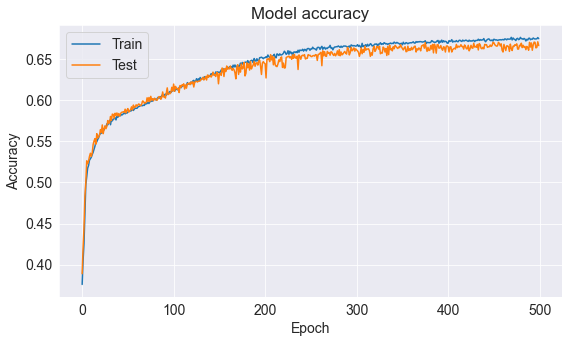

In [149]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [150]:
#Model Architecture with tanh as activation
model = Sequential()
model.add(Dense(12, input_dim=12, activation='tanh'))
model.add(Dense(3, activation='softmax'))

#Showing model summary
model.summary()

#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fitting the model
history = model.fit(X2_train, y_train, validation_data = (X2_test, y_test), epochs=500, batch_size=64)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_41 (Dense)             (None, 3)                 39        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________
Train on 15975 samples, validate on 2820 samples
Epoch 1/500
15975/15975 [==============================] - 0s 26us/step - loss: 1.1252 - accuracy: 0.3589 - val_loss: 1.0501 - val_accuracy: 0.4691
Epoch 2/500
15975/15975 [==============================] - 0s 13us/step - loss: 1.0263 - accuracy: 0.4987 - val_loss: 1.0143 - val_accuracy: 0.5184
Epoch 3/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.9959 - accuracy: 0.5175 - val_loss: 0.9892 - val_accuracy: 0.5270
Epoch 4/500
15975/15975 

15975/15975 [==============================] - 0s 13us/step - loss: 0.8134 - accuracy: 0.6257 - val_loss: 0.8124 - val_accuracy: 0.6177
Epoch 52/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8126 - accuracy: 0.6259 - val_loss: 0.8107 - val_accuracy: 0.6252
Epoch 53/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.8110 - accuracy: 0.6269 - val_loss: 0.8107 - val_accuracy: 0.6145
Epoch 54/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.8101 - accuracy: 0.6286 - val_loss: 0.8076 - val_accuracy: 0.6287
Epoch 55/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8093 - accuracy: 0.6317 - val_loss: 0.8072 - val_accuracy: 0.6277
Epoch 56/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8087 - accuracy: 0.6302 - val_loss: 0.8067 - val_accuracy: 0.6316
Epoch 57/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8078 - accuracy: 0.6315 - val_loss: 

15975/15975 [==============================] - 0s 13us/step - loss: 0.7780 - accuracy: 0.6580 - val_loss: 0.7773 - val_accuracy: 0.6546
Epoch 107/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7772 - accuracy: 0.6588 - val_loss: 0.7757 - val_accuracy: 0.6557
Epoch 108/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7767 - accuracy: 0.6609 - val_loss: 0.7791 - val_accuracy: 0.6401
Epoch 109/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7772 - accuracy: 0.6567 - val_loss: 0.7751 - val_accuracy: 0.6585
Epoch 110/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7764 - accuracy: 0.6585 - val_loss: 0.7776 - val_accuracy: 0.6465
Epoch 111/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7762 - accuracy: 0.6610 - val_loss: 0.7743 - val_accuracy: 0.6571
Epoch 112/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7763 - accuracy: 0.6599 - val_

Epoch 161/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7655 - accuracy: 0.6634 - val_loss: 0.7659 - val_accuracy: 0.6621
Epoch 162/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7645 - accuracy: 0.6645 - val_loss: 0.7665 - val_accuracy: 0.6645
Epoch 163/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7648 - accuracy: 0.6662 - val_loss: 0.7647 - val_accuracy: 0.6621
Epoch 164/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7640 - accuracy: 0.6672 - val_loss: 0.7659 - val_accuracy: 0.6582
Epoch 165/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7640 - accuracy: 0.6652 - val_loss: 0.7638 - val_accuracy: 0.6535
Epoch 166/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7638 - accuracy: 0.6672 - val_loss: 0.7654 - val_accuracy: 0.6628
Epoch 167/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7633 - accuracy:

15975/15975 [==============================] - 0s 13us/step - loss: 0.7577 - accuracy: 0.6677 - val_loss: 0.7607 - val_accuracy: 0.6546
Epoch 216/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7574 - accuracy: 0.6677 - val_loss: 0.7600 - val_accuracy: 0.6617
Epoch 217/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7577 - accuracy: 0.6684 - val_loss: 0.7602 - val_accuracy: 0.6635
Epoch 218/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7576 - accuracy: 0.6702 - val_loss: 0.7599 - val_accuracy: 0.6578
Epoch 219/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7569 - accuracy: 0.6697 - val_loss: 0.7596 - val_accuracy: 0.6592
Epoch 220/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7574 - accuracy: 0.6685 - val_loss: 0.7600 - val_accuracy: 0.6585
Epoch 221/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7567 - accuracy: 0.6692 - val_

Epoch 270/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7523 - accuracy: 0.6689 - val_loss: 0.7554 - val_accuracy: 0.6688
Epoch 271/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7524 - accuracy: 0.6708 - val_loss: 0.7579 - val_accuracy: 0.6642
Epoch 272/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.7519 - accuracy: 0.6702 - val_loss: 0.7564 - val_accuracy: 0.6674
Epoch 273/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7523 - accuracy: 0.6708 - val_loss: 0.7563 - val_accuracy: 0.6674
Epoch 274/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7513 - accuracy: 0.6724 - val_loss: 0.7550 - val_accuracy: 0.6649
Epoch 275/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7515 - accuracy: 0.6718 - val_loss: 0.7551 - val_accuracy: 0.6635
Epoch 276/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7514 - accuracy:

15975/15975 [==============================] - 0s 13us/step - loss: 0.7478 - accuracy: 0.6705 - val_loss: 0.7553 - val_accuracy: 0.6684
Epoch 325/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7478 - accuracy: 0.6714 - val_loss: 0.7536 - val_accuracy: 0.6695
Epoch 326/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7476 - accuracy: 0.6707 - val_loss: 0.7542 - val_accuracy: 0.6684
Epoch 327/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7474 - accuracy: 0.6722 - val_loss: 0.7555 - val_accuracy: 0.6649
Epoch 328/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7473 - accuracy: 0.6732 - val_loss: 0.7552 - val_accuracy: 0.6695
Epoch 329/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.7476 - accuracy: 0.6727 - val_loss: 0.7554 - val_accuracy: 0.6716
Epoch 330/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7474 - accuracy: 0.6746 - val_

Epoch 379/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.7440 - accuracy: 0.6731 - val_loss: 0.7511 - val_accuracy: 0.6734
Epoch 380/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7441 - accuracy: 0.6732 - val_loss: 0.7533 - val_accuracy: 0.6649
Epoch 381/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7439 - accuracy: 0.6739 - val_loss: 0.7516 - val_accuracy: 0.6759
Epoch 382/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7442 - accuracy: 0.6728 - val_loss: 0.7521 - val_accuracy: 0.6699
Epoch 383/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7436 - accuracy: 0.6753 - val_loss: 0.7556 - val_accuracy: 0.6642
Epoch 384/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.7442 - accuracy: 0.6736 - val_loss: 0.7518 - val_accuracy: 0.6727
Epoch 385/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7442 - accuracy:

15975/15975 [==============================] - 0s 13us/step - loss: 0.7411 - accuracy: 0.6768 - val_loss: 0.7533 - val_accuracy: 0.6674
Epoch 434/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7410 - accuracy: 0.6741 - val_loss: 0.7503 - val_accuracy: 0.6691
Epoch 435/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7414 - accuracy: 0.6731 - val_loss: 0.7523 - val_accuracy: 0.6670
Epoch 436/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7412 - accuracy: 0.6749 - val_loss: 0.7533 - val_accuracy: 0.6741
Epoch 437/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7410 - accuracy: 0.6732 - val_loss: 0.7511 - val_accuracy: 0.6695
Epoch 438/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7403 - accuracy: 0.6730 - val_loss: 0.7495 - val_accuracy: 0.6766
Epoch 439/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7414 - accuracy: 0.6747 - val_

Epoch 488/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7387 - accuracy: 0.6755 - val_loss: 0.7508 - val_accuracy: 0.6826
Epoch 489/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7386 - accuracy: 0.6756 - val_loss: 0.7518 - val_accuracy: 0.6613
Epoch 490/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7388 - accuracy: 0.6769 - val_loss: 0.7490 - val_accuracy: 0.6809
Epoch 491/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7383 - accuracy: 0.6758 - val_loss: 0.7491 - val_accuracy: 0.6794
Epoch 492/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7381 - accuracy: 0.6768 - val_loss: 0.7496 - val_accuracy: 0.6734
Epoch 493/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7378 - accuracy: 0.6762 - val_loss: 0.7545 - val_accuracy: 0.6631
Epoch 494/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7386 - accuracy:

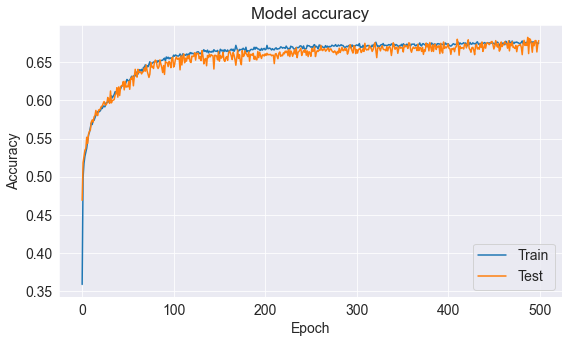

In [151]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [152]:
#Model Architecture with relu as activation
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(3, activation='softmax'))

#Showing model summary
model.summary()

#Compiling the model with optimizer as ADAM
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fitting the model
history = model.fit(X2_train, y_train, validation_data = (X2_test, y_test), epochs=500, batch_size=64)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_43 (Dense)             (None, 3)                 39        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________
Train on 15975 samples, validate on 2820 samples
Epoch 1/500
15975/15975 [==============================] - 0s 27us/step - loss: 1.1027 - accuracy: 0.4113 - val_loss: 1.0729 - val_accuracy: 0.4408
Epoch 2/500
15975/15975 [==============================] - 0s 13us/step - loss: 1.0515 - accuracy: 0.4734 - val_loss: 1.0355 - val_accuracy: 0.4940
Epoch 3/500
15975/15975 [==============================] - 0s 14us/step - loss: 1.0166 - accuracy: 0.4976 - val_loss: 1.0026 - val_accuracy: 0.5025
Epoch 4/500
15975/15975 

15975/15975 [==============================] - 0s 13us/step - loss: 0.8260 - accuracy: 0.5957 - val_loss: 0.8269 - val_accuracy: 0.5908
Epoch 52/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8256 - accuracy: 0.5970 - val_loss: 0.8249 - val_accuracy: 0.5918
Epoch 53/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.8246 - accuracy: 0.5972 - val_loss: 0.8252 - val_accuracy: 0.5954
Epoch 54/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.8242 - accuracy: 0.5986 - val_loss: 0.8242 - val_accuracy: 0.5929
Epoch 55/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8241 - accuracy: 0.5974 - val_loss: 0.8236 - val_accuracy: 0.5933
Epoch 56/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8232 - accuracy: 0.5976 - val_loss: 0.8228 - val_accuracy: 0.5954
Epoch 57/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8226 - accuracy: 0.5989 - val_loss: 

15975/15975 [==============================] - 0s 13us/step - loss: 0.7827 - accuracy: 0.6491 - val_loss: 0.7837 - val_accuracy: 0.6507
Epoch 107/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7815 - accuracy: 0.6512 - val_loss: 0.7824 - val_accuracy: 0.6440
Epoch 108/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7807 - accuracy: 0.6555 - val_loss: 0.7834 - val_accuracy: 0.6518
Epoch 109/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7796 - accuracy: 0.6543 - val_loss: 0.7806 - val_accuracy: 0.6532
Epoch 110/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7793 - accuracy: 0.6553 - val_loss: 0.7798 - val_accuracy: 0.6624
Epoch 111/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7783 - accuracy: 0.6557 - val_loss: 0.7786 - val_accuracy: 0.6553
Epoch 112/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7777 - accuracy: 0.6579 - val_

15975/15975 [==============================] - 0s 14us/step - loss: 0.7454 - accuracy: 0.6734 - val_loss: 0.7533 - val_accuracy: 0.6723
Epoch 161/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7462 - accuracy: 0.6737 - val_loss: 0.7529 - val_accuracy: 0.6745
Epoch 162/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7449 - accuracy: 0.6738 - val_loss: 0.7531 - val_accuracy: 0.6741
Epoch 163/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.7448 - accuracy: 0.6757 - val_loss: 0.7516 - val_accuracy: 0.6766
Epoch 164/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.7440 - accuracy: 0.6767 - val_loss: 0.7524 - val_accuracy: 0.6738
Epoch 165/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7441 - accuracy: 0.6751 - val_loss: 0.7511 - val_accuracy: 0.6702
Epoch 166/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7438 - accuracy: 0.6754 - val_

15975/15975 [==============================] - 0s 14us/step - loss: 0.7335 - accuracy: 0.6811 - val_loss: 0.7441 - val_accuracy: 0.6734
Epoch 215/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7343 - accuracy: 0.6808 - val_loss: 0.7451 - val_accuracy: 0.6738
Epoch 216/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7343 - accuracy: 0.6779 - val_loss: 0.7446 - val_accuracy: 0.6745
Epoch 217/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7337 - accuracy: 0.6796 - val_loss: 0.7454 - val_accuracy: 0.6748
Epoch 218/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7337 - accuracy: 0.6798 - val_loss: 0.7431 - val_accuracy: 0.6730
Epoch 219/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7332 - accuracy: 0.6795 - val_loss: 0.7478 - val_accuracy: 0.6730
Epoch 220/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7334 - accuracy: 0.6787 - val_

Epoch 269/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7273 - accuracy: 0.6821 - val_loss: 0.7421 - val_accuracy: 0.6681
Epoch 270/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7274 - accuracy: 0.6818 - val_loss: 0.7412 - val_accuracy: 0.6755
Epoch 271/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7270 - accuracy: 0.6858 - val_loss: 0.7385 - val_accuracy: 0.6819
Epoch 272/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7282 - accuracy: 0.6849 - val_loss: 0.7425 - val_accuracy: 0.6780
Epoch 273/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7280 - accuracy: 0.6801 - val_loss: 0.7393 - val_accuracy: 0.6780
Epoch 274/500
15975/15975 [==============================] - ETA: 0s - loss: 0.7294 - accuracy: 0.68 - 0s 14us/step - loss: 0.7270 - accuracy: 0.6842 - val_loss: 0.7408 - val_accuracy: 0.6773
Epoch 275/500
15975/15975 [==============================]

15975/15975 [==============================] - 0s 13us/step - loss: 0.7248 - accuracy: 0.6834 - val_loss: 0.7411 - val_accuracy: 0.6801
Epoch 324/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7243 - accuracy: 0.6825 - val_loss: 0.7426 - val_accuracy: 0.6727
Epoch 325/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.7243 - accuracy: 0.6819 - val_loss: 0.7374 - val_accuracy: 0.6773
Epoch 326/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7242 - accuracy: 0.6834 - val_loss: 0.7401 - val_accuracy: 0.6780
Epoch 327/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7244 - accuracy: 0.6852 - val_loss: 0.7420 - val_accuracy: 0.6787
Epoch 328/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7238 - accuracy: 0.6839 - val_loss: 0.7385 - val_accuracy: 0.6791
Epoch 329/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7242 - accuracy: 0.6804 - val_

Epoch 378/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7222 - accuracy: 0.6816 - val_loss: 0.7390 - val_accuracy: 0.6826
Epoch 379/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7225 - accuracy: 0.6837 - val_loss: 0.7396 - val_accuracy: 0.6784
Epoch 380/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7228 - accuracy: 0.6835 - val_loss: 0.7382 - val_accuracy: 0.6801
Epoch 381/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7217 - accuracy: 0.6846 - val_loss: 0.7400 - val_accuracy: 0.6784
Epoch 382/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7232 - accuracy: 0.6843 - val_loss: 0.7364 - val_accuracy: 0.6734
Epoch 383/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7223 - accuracy: 0.6824 - val_loss: 0.7357 - val_accuracy: 0.6805
Epoch 384/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7222 - accuracy:

15975/15975 [==============================] - 0s 13us/step - loss: 0.7196 - accuracy: 0.6852 - val_loss: 0.7377 - val_accuracy: 0.6794
Epoch 433/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7209 - accuracy: 0.6820 - val_loss: 0.7375 - val_accuracy: 0.6787
Epoch 434/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7208 - accuracy: 0.6829 - val_loss: 0.7366 - val_accuracy: 0.6773
Epoch 435/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.7202 - accuracy: 0.6856 - val_loss: 0.7375 - val_accuracy: 0.6762
Epoch 436/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.7204 - accuracy: 0.6846 - val_loss: 0.7385 - val_accuracy: 0.6759
Epoch 437/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7204 - accuracy: 0.6844 - val_loss: 0.7369 - val_accuracy: 0.6830
Epoch 438/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7216 - accuracy: 0.6833 - val_

Epoch 487/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7183 - accuracy: 0.6823 - val_loss: 0.7354 - val_accuracy: 0.6865
Epoch 488/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7185 - accuracy: 0.6837 - val_loss: 0.7362 - val_accuracy: 0.6816
Epoch 489/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7182 - accuracy: 0.6856 - val_loss: 0.7369 - val_accuracy: 0.6766
Epoch 490/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7193 - accuracy: 0.6843 - val_loss: 0.7342 - val_accuracy: 0.6784
Epoch 491/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7183 - accuracy: 0.6846 - val_loss: 0.7372 - val_accuracy: 0.6787
Epoch 492/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7182 - accuracy: 0.6838 - val_loss: 0.7337 - val_accuracy: 0.6801
Epoch 493/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7182 - accuracy:

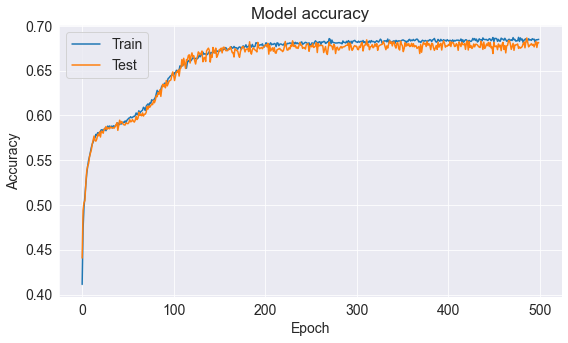

In [153]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [156]:
#Model Architecture with relu as activation
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(3, activation='softmax'))

#Showing model summary
model.summary()

#Compiling the model with optimizer as Stochastic Gradient Descent
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#Fitting the model
history = model.fit(X2_train, y_train, validation_data = (X2_test, y_test), epochs=500, batch_size=64)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_47 (Dense)             (None, 3)                 39        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________
Train on 15975 samples, validate on 2820 samples
Epoch 1/500
15975/15975 [==============================] - 0s 27us/step - loss: 1.1233 - accuracy: 0.3415 - val_loss: 1.0945 - val_accuracy: 0.3674
Epoch 2/500
15975/15975 [==============================] - 0s 13us/step - loss: 1.0784 - accuracy: 0.3992 - val_loss: 1.0725 - val_accuracy: 0.4191
Epoch 3/500
15975/15975 [==============================] - 0s 13us/step - loss: 1.0604 - accuracy: 0.4408 - val_loss: 1.0585 - val_accuracy: 0.4496
Epoch 4/500
15975/15975 

15975/15975 [==============================] - 0s 13us/step - loss: 0.9353 - accuracy: 0.5197 - val_loss: 0.9488 - val_accuracy: 0.5255
Epoch 52/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.9343 - accuracy: 0.5217 - val_loss: 0.9477 - val_accuracy: 0.5220
Epoch 53/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.9332 - accuracy: 0.5216 - val_loss: 0.9472 - val_accuracy: 0.5181
Epoch 54/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.9323 - accuracy: 0.5213 - val_loss: 0.9458 - val_accuracy: 0.5238
Epoch 55/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.9312 - accuracy: 0.5216 - val_loss: 0.9451 - val_accuracy: 0.5245
Epoch 56/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.9305 - accuracy: 0.5222 - val_loss: 0.9440 - val_accuracy: 0.5245
Epoch 57/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.9296 - accuracy: 0.5241 - val_loss: 

Epoch 105/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8910 - accuracy: 0.5472 - val_loss: 0.9000 - val_accuracy: 0.5436
Epoch 106/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8908 - accuracy: 0.5459 - val_loss: 0.8985 - val_accuracy: 0.5429
Epoch 107/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8898 - accuracy: 0.5492 - val_loss: 0.8981 - val_accuracy: 0.5436
Epoch 108/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8894 - accuracy: 0.5487 - val_loss: 0.8976 - val_accuracy: 0.5479
Epoch 109/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8886 - accuracy: 0.5504 - val_loss: 0.8968 - val_accuracy: 0.5411
Epoch 110/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.8879 - accuracy: 0.5477 - val_loss: 0.8958 - val_accuracy: 0.5387
Epoch 111/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.8874 - accuracy:

15975/15975 [==============================] - 0s 12us/step - loss: 0.8660 - accuracy: 0.5639 - val_loss: 0.8733 - val_accuracy: 0.5695
Epoch 160/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8657 - accuracy: 0.5677 - val_loss: 0.8756 - val_accuracy: 0.5504
Epoch 161/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8656 - accuracy: 0.5677 - val_loss: 0.8719 - val_accuracy: 0.5635
Epoch 162/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8647 - accuracy: 0.5682 - val_loss: 0.8731 - val_accuracy: 0.5596
Epoch 163/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8647 - accuracy: 0.5666 - val_loss: 0.8713 - val_accuracy: 0.5674
Epoch 164/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8642 - accuracy: 0.5688 - val_loss: 0.8709 - val_accuracy: 0.5624
Epoch 165/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8638 - accuracy: 0.5681 - val_

Epoch 214/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8528 - accuracy: 0.5765 - val_loss: 0.8591 - val_accuracy: 0.5830
Epoch 215/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8526 - accuracy: 0.5777 - val_loss: 0.8575 - val_accuracy: 0.5791
Epoch 216/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8521 - accuracy: 0.5777 - val_loss: 0.8581 - val_accuracy: 0.5741
Epoch 217/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8523 - accuracy: 0.5774 - val_loss: 0.8572 - val_accuracy: 0.5787
Epoch 218/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8521 - accuracy: 0.5768 - val_loss: 0.8571 - val_accuracy: 0.5745
Epoch 219/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8518 - accuracy: 0.5776 - val_loss: 0.8574 - val_accuracy: 0.5777
Epoch 220/500
15975/15975 [==============================] - ETA: 0s - loss: 0.8511 - accuracy: 0.57

15975/15975 [==============================] - 0s 13us/step - loss: 0.8454 - accuracy: 0.5832 - val_loss: 0.8501 - val_accuracy: 0.5752
Epoch 269/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8450 - accuracy: 0.5852 - val_loss: 0.8499 - val_accuracy: 0.5830
Epoch 270/500
15975/15975 [==============================] - ETA: 0s - loss: 0.8446 - accuracy: 0.58 - 0s 13us/step - loss: 0.8453 - accuracy: 0.5822 - val_loss: 0.8510 - val_accuracy: 0.5883
Epoch 271/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8453 - accuracy: 0.5811 - val_loss: 0.8490 - val_accuracy: 0.5798
Epoch 272/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8445 - accuracy: 0.5853 - val_loss: 0.8512 - val_accuracy: 0.5762
Epoch 273/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8449 - accuracy: 0.5847 - val_loss: 0.8492 - val_accuracy: 0.5826
Epoch 274/500
15975/15975 [==============================] - 0s 12us/ste

15975/15975 [==============================] - 0s 12us/step - loss: 0.8405 - accuracy: 0.5854 - val_loss: 0.8451 - val_accuracy: 0.5865
Epoch 323/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8406 - accuracy: 0.5862 - val_loss: 0.8455 - val_accuracy: 0.5883
Epoch 324/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8402 - accuracy: 0.5864 - val_loss: 0.8462 - val_accuracy: 0.5862
Epoch 325/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8406 - accuracy: 0.5864 - val_loss: 0.8441 - val_accuracy: 0.5869
Epoch 326/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8402 - accuracy: 0.5872 - val_loss: 0.8446 - val_accuracy: 0.5865
Epoch 327/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.8397 - accuracy: 0.5885 - val_loss: 0.8462 - val_accuracy: 0.5911
Epoch 328/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8398 - accuracy: 0.5874 - val_

Epoch 376/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8369 - accuracy: 0.5904 - val_loss: 0.8405 - val_accuracy: 0.5922
Epoch 377/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8368 - accuracy: 0.5915 - val_loss: 0.8409 - val_accuracy: 0.5897
Epoch 378/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8366 - accuracy: 0.5903 - val_loss: 0.8410 - val_accuracy: 0.5926
Epoch 379/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.8368 - accuracy: 0.5909 - val_loss: 0.8421 - val_accuracy: 0.5929
Epoch 380/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8368 - accuracy: 0.5914 - val_loss: 0.8419 - val_accuracy: 0.5901
Epoch 381/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8364 - accuracy: 0.5899 - val_loss: 0.8418 - val_accuracy: 0.5926
Epoch 382/500
15975/15975 [==============================] - ETA: 0s - loss: 0.8367 - accuracy: 0.58

15975/15975 [==============================] - 0s 12us/step - loss: 0.8331 - accuracy: 0.5930 - val_loss: 0.8380 - val_accuracy: 0.5993
Epoch 430/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8334 - accuracy: 0.5930 - val_loss: 0.8374 - val_accuracy: 0.5954
Epoch 431/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.8329 - accuracy: 0.5960 - val_loss: 0.8367 - val_accuracy: 0.5989
Epoch 432/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8326 - accuracy: 0.5918 - val_loss: 0.8372 - val_accuracy: 0.5968
Epoch 433/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8330 - accuracy: 0.5936 - val_loss: 0.8399 - val_accuracy: 0.5911
Epoch 434/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.8330 - accuracy: 0.5929 - val_loss: 0.8372 - val_accuracy: 0.5940
Epoch 435/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8328 - accuracy: 0.5960 - val_

15975/15975 [==============================] - 0s 13us/step - loss: 0.8291 - accuracy: 0.5962 - val_loss: 0.8335 - val_accuracy: 0.6021
Epoch 484/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8290 - accuracy: 0.5966 - val_loss: 0.8363 - val_accuracy: 0.5993
Epoch 485/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8292 - accuracy: 0.5994 - val_loss: 0.8337 - val_accuracy: 0.6018
Epoch 486/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.8290 - accuracy: 0.5975 - val_loss: 0.8351 - val_accuracy: 0.6004
Epoch 487/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8287 - accuracy: 0.5998 - val_loss: 0.8345 - val_accuracy: 0.6028
Epoch 488/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8280 - accuracy: 0.5982 - val_loss: 0.8344 - val_accuracy: 0.5993
Epoch 489/500
15975/15975 [==============================] - 0s 12us/step - loss: 0.8283 - accuracy: 0.5982 - val_

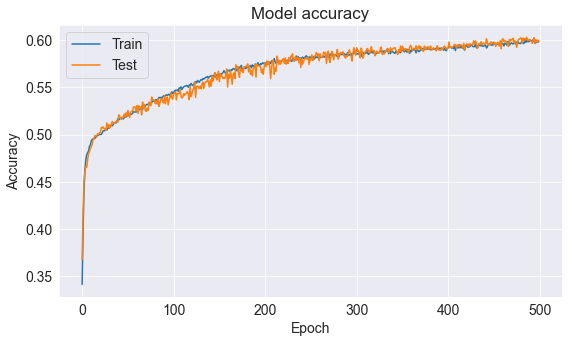

In [157]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [158]:
#Model Architecture with relu as activation
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(3, activation='softmax'))

#Showing model summary
model.summary()

#Compiling the model with optimizer RMSprop
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#Fitting the model
history = model.fit(X2_train, y_train, validation_data = (X2_test, y_test), epochs=500, batch_size=64)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_49 (Dense)             (None, 3)                 39        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________
Train on 15975 samples, validate on 2820 samples
Epoch 1/500
15975/15975 [==============================] - 1s 33us/step - loss: 1.1033 - accuracy: 0.3776 - val_loss: 1.0725 - val_accuracy: 0.4067
Epoch 2/500
15975/15975 [==============================] - 0s 18us/step - loss: 1.0500 - accuracy: 0.4511 - val_loss: 1.0302 - val_accuracy: 0.4918
Epoch 3/500
15975/15975 [==============================] - 0s 16us/step - loss: 1.0084 - accuracy: 0.4968 - val_loss: 0.9962 - val_accuracy: 0.5025
Epoch 4/500
15975/15975 

15975/15975 [==============================] - 0s 13us/step - loss: 0.8159 - accuracy: 0.6177 - val_loss: 0.8141 - val_accuracy: 0.6145
Epoch 52/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8150 - accuracy: 0.6177 - val_loss: 0.8136 - val_accuracy: 0.6181
Epoch 53/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8146 - accuracy: 0.6207 - val_loss: 0.8132 - val_accuracy: 0.6181
Epoch 54/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8139 - accuracy: 0.6207 - val_loss: 0.8116 - val_accuracy: 0.6163
Epoch 55/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8127 - accuracy: 0.6200 - val_loss: 0.8117 - val_accuracy: 0.6184
Epoch 56/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8120 - accuracy: 0.6219 - val_loss: 0.8104 - val_accuracy: 0.6160
Epoch 57/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.8108 - accuracy: 0.6218 - val_loss: 

15975/15975 [==============================] - 0s 18us/step - loss: 0.7793 - accuracy: 0.6580 - val_loss: 0.7827 - val_accuracy: 0.6553
Epoch 106/500
15975/15975 [==============================] - 0s 18us/step - loss: 0.7790 - accuracy: 0.6575 - val_loss: 0.7826 - val_accuracy: 0.6415
Epoch 107/500
15975/15975 [==============================] - 0s 18us/step - loss: 0.7783 - accuracy: 0.6582 - val_loss: 0.7802 - val_accuracy: 0.6596
Epoch 108/500
15975/15975 [==============================] - 0s 17us/step - loss: 0.7782 - accuracy: 0.6602 - val_loss: 0.7804 - val_accuracy: 0.6507
Epoch 109/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7770 - accuracy: 0.6593 - val_loss: 0.7806 - val_accuracy: 0.6539
Epoch 110/500
15975/15975 [==============================] - 0s 18us/step - loss: 0.7770 - accuracy: 0.6610 - val_loss: 0.7819 - val_accuracy: 0.6450
Epoch 111/500
15975/15975 [==============================] - 0s 17us/step - loss: 0.7767 - accuracy: 0.6585 - val_

15975/15975 [==============================] - 0s 13us/step - loss: 0.7563 - accuracy: 0.6717 - val_loss: 0.7596 - val_accuracy: 0.6638
Epoch 160/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7557 - accuracy: 0.6700 - val_loss: 0.7594 - val_accuracy: 0.6667
Epoch 161/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7552 - accuracy: 0.6708 - val_loss: 0.7578 - val_accuracy: 0.6695
Epoch 162/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7554 - accuracy: 0.6700 - val_loss: 0.7564 - val_accuracy: 0.6628
Epoch 163/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7545 - accuracy: 0.6701 - val_loss: 0.7615 - val_accuracy: 0.6624
Epoch 164/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.7547 - accuracy: 0.6708 - val_loss: 0.7566 - val_accuracy: 0.6691
Epoch 165/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.7542 - accuracy: 0.6715 - val_

Epoch 214/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.7431 - accuracy: 0.6746 - val_loss: 0.7477 - val_accuracy: 0.6723
Epoch 215/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7430 - accuracy: 0.6759 - val_loss: 0.7478 - val_accuracy: 0.6759
Epoch 216/500
15975/15975 [==============================] - 0s 18us/step - loss: 0.7430 - accuracy: 0.6739 - val_loss: 0.7474 - val_accuracy: 0.6691
Epoch 217/500
15975/15975 [==============================] - 0s 17us/step - loss: 0.7429 - accuracy: 0.6774 - val_loss: 0.7482 - val_accuracy: 0.6667
Epoch 218/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.7427 - accuracy: 0.6765 - val_loss: 0.7492 - val_accuracy: 0.6660
Epoch 219/500
15975/15975 [==============================] - 0s 17us/step - loss: 0.7423 - accuracy: 0.6739 - val_loss: 0.7466 - val_accuracy: 0.6713
Epoch 220/500
15975/15975 [==============================] - 0s 18us/step - loss: 0.7424 - accuracy:

15975/15975 [==============================] - 0s 16us/step - loss: 0.7362 - accuracy: 0.6774 - val_loss: 0.7442 - val_accuracy: 0.6759
Epoch 269/500
15975/15975 [==============================] - 0s 20us/step - loss: 0.7360 - accuracy: 0.6777 - val_loss: 0.7453 - val_accuracy: 0.6755
Epoch 270/500
15975/15975 [==============================] - 0s 19us/step - loss: 0.7360 - accuracy: 0.6779 - val_loss: 0.7439 - val_accuracy: 0.6766
Epoch 271/500
15975/15975 [==============================] - 0s 23us/step - loss: 0.7359 - accuracy: 0.6804 - val_loss: 0.7427 - val_accuracy: 0.6762
Epoch 272/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.7354 - accuracy: 0.6782 - val_loss: 0.7440 - val_accuracy: 0.6720
Epoch 273/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.7357 - accuracy: 0.6771 - val_loss: 0.7431 - val_accuracy: 0.6748
Epoch 274/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.7354 - accuracy: 0.6808 - val_

15975/15975 [==============================] - 0s 13us/step - loss: 0.7307 - accuracy: 0.6808 - val_loss: 0.7398 - val_accuracy: 0.6759
Epoch 323/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7309 - accuracy: 0.6811 - val_loss: 0.7399 - val_accuracy: 0.6770
Epoch 324/500
15975/15975 [==============================] - ETA: 0s - loss: 0.7309 - accuracy: 0.68 - 0s 13us/step - loss: 0.7307 - accuracy: 0.6831 - val_loss: 0.7402 - val_accuracy: 0.6816
Epoch 325/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7308 - accuracy: 0.6808 - val_loss: 0.7449 - val_accuracy: 0.6755
Epoch 326/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7308 - accuracy: 0.6803 - val_loss: 0.7430 - val_accuracy: 0.6752
Epoch 327/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7308 - accuracy: 0.6815 - val_loss: 0.7388 - val_accuracy: 0.6766
Epoch 328/500
15975/15975 [==============================] - 0s 13us/ste

15975/15975 [==============================] - 0s 18us/step - loss: 0.7272 - accuracy: 0.6826 - val_loss: 0.7390 - val_accuracy: 0.6780
Epoch 377/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.7271 - accuracy: 0.6821 - val_loss: 0.7384 - val_accuracy: 0.6762
Epoch 378/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7274 - accuracy: 0.6816 - val_loss: 0.7358 - val_accuracy: 0.6794
Epoch 379/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7272 - accuracy: 0.6818 - val_loss: 0.7377 - val_accuracy: 0.6801
Epoch 380/500
15975/15975 [==============================] - 0s 18us/step - loss: 0.7272 - accuracy: 0.6828 - val_loss: 0.7378 - val_accuracy: 0.6833
Epoch 381/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7270 - accuracy: 0.6850 - val_loss: 0.7372 - val_accuracy: 0.6777
Epoch 382/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7272 - accuracy: 0.6833 - val_

Epoch 430/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7236 - accuracy: 0.6841 - val_loss: 0.7331 - val_accuracy: 0.6826
Epoch 431/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7237 - accuracy: 0.6825 - val_loss: 0.7336 - val_accuracy: 0.6819
Epoch 432/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7241 - accuracy: 0.6858 - val_loss: 0.7350 - val_accuracy: 0.6840
Epoch 433/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7233 - accuracy: 0.6852 - val_loss: 0.7363 - val_accuracy: 0.6766
Epoch 434/500
15975/15975 [==============================] - ETA: 0s - loss: 0.7242 - accuracy: 0.68 - 0s 13us/step - loss: 0.7229 - accuracy: 0.6858 - val_loss: 0.7347 - val_accuracy: 0.6801
Epoch 435/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7238 - accuracy: 0.6860 - val_loss: 0.7361 - val_accuracy: 0.6787
Epoch 436/500
15975/15975 [==============================]

Epoch 484/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7190 - accuracy: 0.6882 - val_loss: 0.7315 - val_accuracy: 0.6787
Epoch 485/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7200 - accuracy: 0.6856 - val_loss: 0.7296 - val_accuracy: 0.6844
Epoch 486/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7192 - accuracy: 0.6855 - val_loss: 0.7361 - val_accuracy: 0.6794
Epoch 487/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7196 - accuracy: 0.6878 - val_loss: 0.7305 - val_accuracy: 0.6805
Epoch 488/500
15975/15975 [==============================] - ETA: 0s - loss: 0.7187 - accuracy: 0.68 - 0s 12us/step - loss: 0.7188 - accuracy: 0.6843 - val_loss: 0.7324 - val_accuracy: 0.6794
Epoch 489/500
15975/15975 [==============================] - 0s 13us/step - loss: 0.7191 - accuracy: 0.6861 - val_loss: 0.7344 - val_accuracy: 0.6830
Epoch 490/500
15975/15975 [==============================]

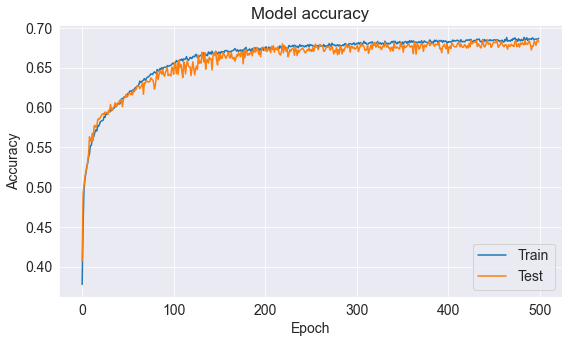

In [159]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

So till now among the model we have trainned best result is provided with **scaled features, one hidden layer with 12 nodes and activation as ReLU and optimizer as ADAM**. This model provides us the accuracy of **70%** on training set and **69.5%** on test set.

Now lets try another variation. Till now we have used Gaussian representation of RGB pixels, now lets break them into individual components

In [161]:
gender_df.head()

,gender,description,fav_number,tweet,tweet_count,desc_len,tweet_len,RBG_link_color,RBG_sidebar_color,link_color,sidebar_color,tweet_words,desc_words,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score,Brand_D_Score
0,male,i sing my own rhythm.,0,Robbie E Responds To Critics After Win Against...,110964,21,109,"(8, 194, 194)","(255, 255, 255)",0.578431,1.000000,"['robbi', 'e', 'respond', 'critic', 'win', 'ed...","['sing', 'rhythm']",0.011182,0.009599,0.010630,0.001268,0.002638,0.000330
1,male,I'm the author of novels filled with family dr...,68,ÛÏIt felt like they were my friends and I was...,7471,62,139,"(0, 132, 180)","(192, 222, 237)",0.435294,0.855882,"['ûïit', 'felt', 'like', 'friend', 'live', 'st...","['author', 'novel', 'fill', 'famili', 'drama',...",0.051138,0.058385,0.046946,0.018237,0.018495,0.010452
2,male,louis whining and squealing and all,7696,i absolutely adore when louis starts the songs...,5617,35,80,"(171, 184, 194)","(192, 222, 237)",0.718627,0.855882,"['absolut', 'ador', 'loui', 'start', 'song', '...","['loui', 'whine', 'squeal']",0.043089,0.042259,0.020020,0.002076,0.001545,0.001330
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,Hi @JordanSpieth - Looking at the url - do you...,1693,146,138,"(0, 132, 180)","(192, 222, 237)",0.435294,0.855882,"['hi', 'jordanspieth', 'look', 'url', 'use', '...","['mobil', 'guy', 'er', 'shazam', 'googl', 'kle...",0.038179,0.036107,0.030881,0.043338,0.011477,0.018466
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,Watching Neighbours on Sky+ catching up with t...,31462,160,95,"(59, 148, 217)","(0, 0, 0)",0.560784,0.000000,"['watch', 'neighbour', 'sky', 'catch', 'neighb...","['ricki', 'wilson', 'best', 'frontman', 'kaise...",0.053490,0.119514,0.018620,0.039516,0.044602,0.044812


In [280]:
new_features_df = gender_df[['fav_number', 'tweet_count', 'desc_len', 'tweet_len',
                         'RBG_link_color', 'RBG_sidebar_color', 'Male_T_Score', 'Female_T_Score', 
                         'Brand_T_Score', 'Male_D_Score', 'Female_D_Score', 'Brand_D_Score']]
dependent_feature_df = dep_feat_df

In [281]:
new_features_df.head()

,fav_number,tweet_count,desc_len,tweet_len,RBG_link_color,RBG_sidebar_color,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score,Brand_D_Score
0,0,110964,21,109,"(8, 194, 194)","(255, 255, 255)",0.011182,0.009599,0.010630,0.001268,0.002638,0.000330
1,68,7471,62,139,"(0, 132, 180)","(192, 222, 237)",0.051138,0.058385,0.046946,0.018237,0.018495,0.010452
2,7696,5617,35,80,"(171, 184, 194)","(192, 222, 237)",0.043089,0.042259,0.020020,0.002076,0.001545,0.001330
3,202,1693,146,138,"(0, 132, 180)","(192, 222, 237)",0.038179,0.036107,0.030881,0.043338,0.011477,0.018466
4,37318,31462,160,95,"(59, 148, 217)","(0, 0, 0)",0.053490,0.119514,0.018620,0.039516,0.044602,0.044812


In [282]:
def RGB_components(rgb_tuple, component_no):
    #Value of component_no should be either 0 or 1 or 2. 0-RED, 1-GREEN, 2-BLUE
    rgb_list = rgb_tuple.lstrip('(').rstrip(')').split(',')
    return int(rgb_list[component_no])

In [283]:
new_features_df.loc[:, 'R_link_color'] = new_features_df.loc[: ,'RBG_link_color'].apply(RGB_components, args=(0,))
new_features_df.loc[:, 'G_link_color'] = new_features_df.loc[: ,'RBG_link_color'].apply(RGB_components, args=(1,))
new_features_df.loc[:, 'B_link_color'] = new_features_df.loc[: ,'RBG_link_color'].apply(RGB_components, args=(2,))

E:\ANACONDA3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
E:\ANACONDA3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [284]:
new_features_df.loc[:, 'R_sidebar_color'] = new_features_df.loc[: ,'RBG_sidebar_color'].apply(RGB_components, args=(0,))
new_features_df.loc[:, 'G_sidebar_color'] = new_features_df.loc[: ,'RBG_sidebar_color'].apply(RGB_components, args=(1,))
new_features_df.loc[:, 'B_sidebar_color'] = new_features_df.loc[: ,'RBG_sidebar_color'].apply(RGB_components, args=(2,))

In [285]:
new_features_df.drop(columns=['RBG_link_color', 'RBG_sidebar_color'], inplace=True)
new_features_df.head()

E:\ANACONDA3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,fav_number,tweet_count,desc_len,tweet_len,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score,Brand_D_Score,R_link_color,G_link_color,B_link_color,R_sidebar_color,G_sidebar_color,B_sidebar_color
0,0,110964,21,109,0.011182,0.009599,0.010630,0.001268,0.002638,0.000330,8,194,194,255,255,255
1,68,7471,62,139,0.051138,0.058385,0.046946,0.018237,0.018495,0.010452,0,132,180,192,222,237
2,7696,5617,35,80,0.043089,0.042259,0.020020,0.002076,0.001545,0.001330,171,184,194,192,222,237
3,202,1693,146,138,0.038179,0.036107,0.030881,0.043338,0.011477,0.018466,0,132,180,192,222,237
4,37318,31462,160,95,0.053490,0.119514,0.018620,0.039516,0.044602,0.044812,59,148,217,0,0,0


In [286]:
new_features_df.shape

(18795, 16)

In [287]:
X = new_features_df.values
y = dependent_feature_df.values
print('X:' ,type(X), X.shape)
print('y:' ,type(y), y.shape)

X: <class 'numpy.ndarray'> (18795, 16)
y: <class 'numpy.ndarray'> (18795, 3)


In [288]:
#Splitting into train_set and test_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=23)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (15975, 16)
y_train.shape:  (15975, 3)
X_test.shape:  (2820, 16)
y_test.shape:  (2820, 3)


In [289]:
#Making an object of StandardScaler
scaler = StandardScaler() 

#Fitting the scaler on X_train
scaler.fit(X_train)

#Transforming the training_set and test_set
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [290]:
#Model Architecture with relu as activation
model = Sequential()
model.add(Dense(12, input_dim=16, activation='relu'))
model.add(Dense(3, activation='softmax'))

#Showing model summary
model.summary()

#Compiling the model with optimizer as Stochastic Gradient Descent
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fitting the model
history = model.fit(scaled_X_train, y_train, validation_data = (scaled_X_test, y_test), epochs=500, batch_size=64)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_61 (Dense)             (None, 3)                 39        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________
Train on 15975 samples, validate on 2820 samples
Epoch 1/500
15975/15975 [==============================] - 1s 31us/step - loss: 1.0387 - accuracy: 0.4233 - val_loss: 0.9332 - val_accuracy: 0.5394
Epoch 2/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.8927 - accuracy: 0.5645 - val_loss: 0.8588 - val_accuracy: 0.5908
Epoch 3/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.8510 - accuracy: 0.5934 - val_loss: 0.8344 - val_accuracy: 0.5922
Epoch 4/500
15975/15975 

15975/15975 [==============================] - 0s 20us/step - loss: 0.7128 - accuracy: 0.6878 - val_loss: 0.7226 - val_accuracy: 0.6915
Epoch 51/500
15975/15975 [==============================] - 0s 20us/step - loss: 0.7119 - accuracy: 0.6894 - val_loss: 0.7232 - val_accuracy: 0.6890
Epoch 52/500
15975/15975 [==============================] - 0s 19us/step - loss: 0.7118 - accuracy: 0.6917 - val_loss: 0.7226 - val_accuracy: 0.6943
Epoch 53/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7114 - accuracy: 0.6890 - val_loss: 0.7225 - val_accuracy: 0.6954
Epoch 54/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.7112 - accuracy: 0.6898 - val_loss: 0.7226 - val_accuracy: 0.6961
Epoch 55/500
15975/15975 [==============================] - 0s 18us/step - loss: 0.7111 - accuracy: 0.6901 - val_loss: 0.7231 - val_accuracy: 0.6936
Epoch 56/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.7109 - accuracy: 0.6885 - val_loss: 

15975/15975 [==============================] - 0s 20us/step - loss: 0.7031 - accuracy: 0.6936 - val_loss: 0.7167 - val_accuracy: 0.6933
Epoch 106/500
15975/15975 [==============================] - 0s 20us/step - loss: 0.7035 - accuracy: 0.6935 - val_loss: 0.7170 - val_accuracy: 0.7007
Epoch 107/500
15975/15975 [==============================] - 0s 19us/step - loss: 0.7023 - accuracy: 0.6925 - val_loss: 0.7192 - val_accuracy: 0.6950
Epoch 108/500
15975/15975 [==============================] - 0s 18us/step - loss: 0.7032 - accuracy: 0.6918 - val_loss: 0.7171 - val_accuracy: 0.6954
Epoch 109/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7026 - accuracy: 0.6909 - val_loss: 0.7167 - val_accuracy: 0.6936
Epoch 110/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.7027 - accuracy: 0.6921 - val_loss: 0.7163 - val_accuracy: 0.6993
Epoch 111/500
15975/15975 [==============================] - 0s 16us/step - loss: 0.7027 - accuracy: 0.6929 - val_

Epoch 160/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6991 - accuracy: 0.6938 - val_loss: 0.7137 - val_accuracy: 0.6982
Epoch 161/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.6993 - accuracy: 0.6937 - val_loss: 0.7129 - val_accuracy: 0.6982
Epoch 162/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6988 - accuracy: 0.6941 - val_loss: 0.7152 - val_accuracy: 0.6975
Epoch 163/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6992 - accuracy: 0.6929 - val_loss: 0.7140 - val_accuracy: 0.6993
Epoch 164/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6990 - accuracy: 0.6940 - val_loss: 0.7142 - val_accuracy: 0.6929
Epoch 165/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6987 - accuracy: 0.6953 - val_loss: 0.7135 - val_accuracy: 0.6933
Epoch 166/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6986 - accuracy:

15975/15975 [==============================] - 0s 18us/step - loss: 0.6959 - accuracy: 0.6959 - val_loss: 0.7138 - val_accuracy: 0.7007
Epoch 215/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6956 - accuracy: 0.6964 - val_loss: 0.7144 - val_accuracy: 0.6993
Epoch 216/500
15975/15975 [==============================] - 0s 17us/step - loss: 0.6961 - accuracy: 0.6966 - val_loss: 0.7123 - val_accuracy: 0.6986
Epoch 217/500
15975/15975 [==============================] - 0s 24us/step - loss: 0.6957 - accuracy: 0.6966 - val_loss: 0.7143 - val_accuracy: 0.6996
Epoch 218/500
15975/15975 [==============================] - 0s 21us/step - loss: 0.6958 - accuracy: 0.6972 - val_loss: 0.7126 - val_accuracy: 0.6957
Epoch 219/500
15975/15975 [==============================] - 0s 28us/step - loss: 0.6954 - accuracy: 0.6965 - val_loss: 0.7131 - val_accuracy: 0.7004
Epoch 220/500
15975/15975 [==============================] - 0s 21us/step - loss: 0.6958 - accuracy: 0.6950 - val_

Epoch 269/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.6937 - accuracy: 0.6975 - val_loss: 0.7109 - val_accuracy: 0.6982
Epoch 270/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6930 - accuracy: 0.6976 - val_loss: 0.7108 - val_accuracy: 0.7004
Epoch 271/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6933 - accuracy: 0.6978 - val_loss: 0.7112 - val_accuracy: 0.7014
Epoch 272/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.6930 - accuracy: 0.6977 - val_loss: 0.7113 - val_accuracy: 0.6947
Epoch 273/500
15975/15975 [==============================] - 0s 19us/step - loss: 0.6934 - accuracy: 0.6973 - val_loss: 0.7123 - val_accuracy: 0.6982
Epoch 274/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6930 - accuracy: 0.6982 - val_loss: 0.7110 - val_accuracy: 0.6996
Epoch 275/500
15975/15975 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.69

15975/15975 [==============================] - 0s 15us/step - loss: 0.6911 - accuracy: 0.6999 - val_loss: 0.7095 - val_accuracy: 0.7018
Epoch 324/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6910 - accuracy: 0.7002 - val_loss: 0.7094 - val_accuracy: 0.6975
Epoch 325/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6910 - accuracy: 0.6980 - val_loss: 0.7078 - val_accuracy: 0.6982
Epoch 326/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.6907 - accuracy: 0.6991 - val_loss: 0.7110 - val_accuracy: 0.6993
Epoch 327/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6908 - accuracy: 0.6994 - val_loss: 0.7063 - val_accuracy: 0.6989
Epoch 328/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6912 - accuracy: 0.7007 - val_loss: 0.7084 - val_accuracy: 0.6982
Epoch 329/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.6908 - accuracy: 0.6989 - val_

Epoch 378/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6893 - accuracy: 0.7011 - val_loss: 0.7059 - val_accuracy: 0.7039
Epoch 379/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6886 - accuracy: 0.7001 - val_loss: 0.7044 - val_accuracy: 0.7025
Epoch 380/500
15975/15975 [==============================] - 0s 18us/step - loss: 0.6889 - accuracy: 0.7011 - val_loss: 0.7061 - val_accuracy: 0.7028
Epoch 381/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.6883 - accuracy: 0.6996 - val_loss: 0.7053 - val_accuracy: 0.6996
Epoch 382/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6883 - accuracy: 0.6996 - val_loss: 0.7069 - val_accuracy: 0.7032
Epoch 383/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6884 - accuracy: 0.7017 - val_loss: 0.7057 - val_accuracy: 0.6965
Epoch 384/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.6883 - accuracy:

15975/15975 [==============================] - 0s 16us/step - loss: 0.6866 - accuracy: 0.7028 - val_loss: 0.7035 - val_accuracy: 0.7025
Epoch 433/500
15975/15975 [==============================] - 0s 20us/step - loss: 0.6870 - accuracy: 0.7020 - val_loss: 0.7045 - val_accuracy: 0.6979
Epoch 434/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.6874 - accuracy: 0.7029 - val_loss: 0.7045 - val_accuracy: 0.6972
Epoch 435/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.6867 - accuracy: 0.7022 - val_loss: 0.7038 - val_accuracy: 0.7014
Epoch 436/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.6867 - accuracy: 0.7028 - val_loss: 0.7036 - val_accuracy: 0.6993
Epoch 437/500
15975/15975 [==============================] - 0s 14us/step - loss: 0.6868 - accuracy: 0.7032 - val_loss: 0.7045 - val_accuracy: 0.6989
Epoch 438/500
15975/15975 [==============================] - 0s 15us/step - loss: 0.6866 - accuracy: 0.7020 - val_

15975/15975 [==============================] - 0s 19us/step - loss: 0.6853 - accuracy: 0.7054 - val_loss: 0.7035 - val_accuracy: 0.6993
Epoch 487/500
15975/15975 [==============================] - 0s 21us/step - loss: 0.6854 - accuracy: 0.7038 - val_loss: 0.7030 - val_accuracy: 0.6996
Epoch 488/500
15975/15975 [==============================] - 0s 21us/step - loss: 0.6853 - accuracy: 0.7030 - val_loss: 0.7039 - val_accuracy: 0.6950
Epoch 489/500
15975/15975 [==============================] - 0s 21us/step - loss: 0.6857 - accuracy: 0.7045 - val_loss: 0.7035 - val_accuracy: 0.6979
Epoch 490/500
15975/15975 [==============================] - 0s 21us/step - loss: 0.6853 - accuracy: 0.7043 - val_loss: 0.7027 - val_accuracy: 0.7025
Epoch 491/500
15975/15975 [==============================] - 0s 27us/step - loss: 0.6853 - accuracy: 0.7037 - val_loss: 0.7025 - val_accuracy: 0.6993
Epoch 492/500
15975/15975 [==============================] - ETA: 0s - loss: 0.6852 - accuracy: 0.70 - 0s 19us/ste

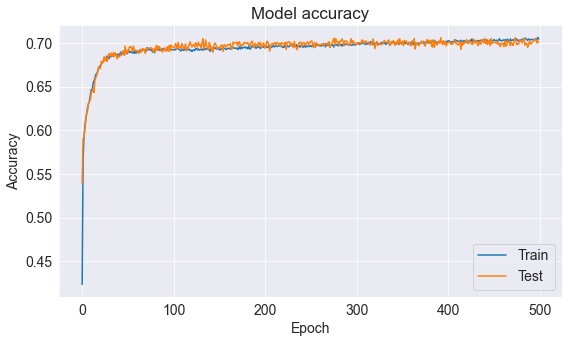

In [291]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

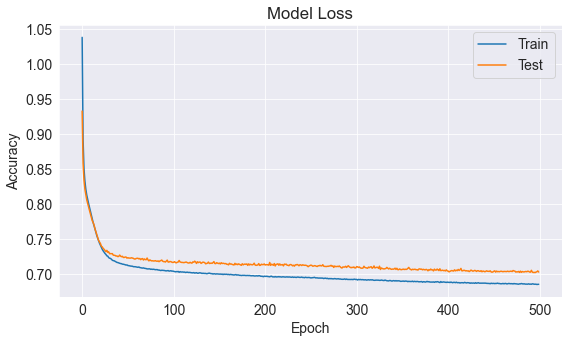

In [292]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

This is our last model and as we can see that is has provided the best results till now. <br>
According to this model:
- Accuracy on Training set: **70.5%**.
- Accuracy on Test set: **70.1%**.<br>

Now let's train the final model once again and do the prediction

## Final Model Training and Prediction

Here we will divide the dataset into 3 sets- Training , Validation, & Test set, so that we can perform the testing as well

In [215]:
finalX_df = new_features_df.copy()
finalY_df = dep_feat_df.copy()
finalX_df.sample(10)

,fav_number,tweet_count,desc_len,tweet_len,Male_T_Score,Female_T_Score,Brand_T_Score,Male_D_Score,Female_D_Score,Brand_D_Score,R_link_color,G_link_color,B_link_color,R_sidebar_color,G_sidebar_color,B_sidebar_color
18112,12,15282,91,102,0.006411,0.004268,0.011214,0.072781,0.065534,0.068258,255,0,0,242,225,149
14104,69484,100051,51,139,0.109692,0.180508,0.042080,0.002865,0.004168,0.000966,146,102,204,0,0,0
14734,412,3709,95,103,0.009939,0.013403,0.002720,0.012964,0.016236,0.008777,0,132,180,192,222,237
5757,501,1303,114,130,0.058955,0.067433,0.037633,0.005230,0.002840,0.002718,74,145,60,0,0,0
13112,1054,57238,0,125,0.061754,0.067769,0.029335,0.023776,0.034654,0.059253,85,85,189,255,255,255
10013,281,878,0,140,0.022194,0.022808,0.015127,0.023776,0.034654,0.059253,0,132,180,192,222,237
11022,144,475,48,109,0.017359,0.020280,0.017960,0.010034,0.012815,0.007977,0,132,180,192,222,237
9767,6035,13826,65,87,0.032876,0.044302,0.019154,0.046888,0.072115,0.033768,0,128,128,242,225,149
9356,7517,12901,140,137,0.045556,0.075042,0.028546,0.023353,0.045013,0.019843,255,0,94,0,0,0
11424,1,27,19,127,0.060889,0.068454,0.041561,0.018670,0.022591,0.024967,0,132,180,192,222,237


First let's separate the test set from the dataframe. We are gonna consider 795 rows (randomly) in our test set.

In [222]:
#getting random indexes of 795 rows for test set
indexes = finalX_df.sample(795).index
testX_df = finalX_df.loc[indexes, :]
testY_df = finalY_df.loc[indexes, :]
testX_df.reset_index(drop=True, inplace=True)
testY_df.reset_index(drop=True, inplace=True)

We have got our **test set** : (testX_df, testY_df)

In [223]:
#Dropping the indexes choosed for test set
finalX_df.drop(index = indexes, inplace=True)
finalY_df.drop(index = indexes, inplace=True)
finalX_df.reset_index(drop=True, inplace=True)
finalY_df.reset_index(drop=True, inplace=True)

In [226]:
finalX_df.shape, finalY_df.shape

((18000, 16), (18000, 3))

In [227]:
# Making numpy arrays from the dataframes
finalX = finalX_df.values
finalY = finalY_df.values

In [228]:
#Splitting into train_set and test_set
finalX_train, finalX_test, finalY_train, finalY_test = train_test_split(finalX, finalY, test_size=0.15, random_state=23)
print('finalX_train.shape: ', finalX_train.shape)
print('finalY_train.shape: ', finalY_train.shape)
print('finalX_test.shape: ', finalX_test.shape)
print('finalY_test.shape: ', finalY_test.shape)

finalX_train.shape:  (15300, 16)
finalY_train.shape:  (15300, 3)
finalX_test.shape:  (2700, 16)
finalY_test.shape:  (2700, 3)


In [230]:
#Making an object of StandardScaler
scaler = StandardScaler() 

#Fitting the scaler on X_train
scaler.fit(finalX_train)

#Transforming the training_set and test_set
final_scaled_X_train = scaler.transform(finalX_train)
final_scaled_X_test = scaler.transform(finalX_test)

In [235]:
#Model Architecture with relu as activation
final_model = Sequential()
final_model.add(Dense(12, input_dim=16, activation='relu'))
final_model.add(Dense(3, activation='softmax'))

#Showing model summary
final_model.summary()

#Compiling the model with optimizer as Stochastic Gradient Descent
final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fitting the model
history = final_model.fit(final_scaled_X_train, finalY_train, validation_data = (final_scaled_X_test, finalY_test), epochs=500, batch_size=64)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_57 (Dense)             (None, 3)                 39        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________
Train on 15300 samples, validate on 2700 samples
Epoch 1/500
15300/15300 [==============================] - 1s 51us/step - loss: 1.2411 - accuracy: 0.3320 - val_loss: 1.0413 - val_accuracy: 0.4533
Epoch 2/500
15300/15300 [==============================] - 0s 15us/step - loss: 0.9677 - accuracy: 0.5148 - val_loss: 0.9205 - val_accuracy: 0.5311
Epoch 3/500
15300/15300 [==============================] - 0s 20us/step - loss: 0.8918 - accuracy: 0.5645 - val_loss: 0.8733 - val_accuracy: 0.5619
Epoch 4/500
15300/15300 

15300/15300 [==============================] - 0s 14us/step - loss: 0.7181 - accuracy: 0.6907 - val_loss: 0.7089 - val_accuracy: 0.6915
Epoch 52/500
15300/15300 [==============================] - 0s 20us/step - loss: 0.7175 - accuracy: 0.6912 - val_loss: 0.7100 - val_accuracy: 0.6837
Epoch 53/500
15300/15300 [==============================] - 0s 15us/step - loss: 0.7176 - accuracy: 0.6901 - val_loss: 0.7061 - val_accuracy: 0.6930
Epoch 54/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.7170 - accuracy: 0.6870 - val_loss: 0.7091 - val_accuracy: 0.6874
Epoch 55/500
15300/15300 [==============================] - 0s 17us/step - loss: 0.7167 - accuracy: 0.6932 - val_loss: 0.7069 - val_accuracy: 0.6919
Epoch 56/500
15300/15300 [==============================] - 0s 20us/step - loss: 0.7161 - accuracy: 0.6892 - val_loss: 0.7069 - val_accuracy: 0.6904
Epoch 57/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.7159 - accuracy: 0.6918 - val_loss: 

15300/15300 [==============================] - 0s 14us/step - loss: 0.7076 - accuracy: 0.6933 - val_loss: 0.6953 - val_accuracy: 0.7015
Epoch 107/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.7073 - accuracy: 0.6942 - val_loss: 0.6961 - val_accuracy: 0.6981
Epoch 108/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.7069 - accuracy: 0.6946 - val_loss: 0.6971 - val_accuracy: 0.6959
Epoch 109/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.7071 - accuracy: 0.6941 - val_loss: 0.6959 - val_accuracy: 0.7026
Epoch 110/500
15300/15300 [==============================] - 0s 16us/step - loss: 0.7073 - accuracy: 0.6932 - val_loss: 0.6967 - val_accuracy: 0.6978
Epoch 111/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.7074 - accuracy: 0.6944 - val_loss: 0.6971 - val_accuracy: 0.6967
Epoch 112/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.7065 - accuracy: 0.6939 - val_

Epoch 161/500
15300/15300 [==============================] - 0s 18us/step - loss: 0.6979 - accuracy: 0.6982 - val_loss: 0.6854 - val_accuracy: 0.7033
Epoch 162/500
15300/15300 [==============================] - 0s 18us/step - loss: 0.6980 - accuracy: 0.6975 - val_loss: 0.6854 - val_accuracy: 0.7037
Epoch 163/500
15300/15300 [==============================] - 0s 18us/step - loss: 0.6981 - accuracy: 0.6985 - val_loss: 0.6861 - val_accuracy: 0.7030
Epoch 164/500
15300/15300 [==============================] - 0s 16us/step - loss: 0.6981 - accuracy: 0.6967 - val_loss: 0.6868 - val_accuracy: 0.7007
Epoch 165/500
15300/15300 [==============================] - 0s 13us/step - loss: 0.6980 - accuracy: 0.6990 - val_loss: 0.6880 - val_accuracy: 0.7022
Epoch 166/500
15300/15300 [==============================] - 0s 15us/step - loss: 0.6977 - accuracy: 0.6982 - val_loss: 0.6854 - val_accuracy: 0.7015
Epoch 167/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6976 - accuracy:

15300/15300 [==============================] - 0s 18us/step - loss: 0.6933 - accuracy: 0.7020 - val_loss: 0.6801 - val_accuracy: 0.7107
Epoch 216/500
15300/15300 [==============================] - 0s 18us/step - loss: 0.6930 - accuracy: 0.7014 - val_loss: 0.6836 - val_accuracy: 0.7085
Epoch 217/500
15300/15300 [==============================] - 0s 18us/step - loss: 0.6934 - accuracy: 0.7012 - val_loss: 0.6825 - val_accuracy: 0.7111
Epoch 218/500
15300/15300 [==============================] - 0s 18us/step - loss: 0.6928 - accuracy: 0.7017 - val_loss: 0.6844 - val_accuracy: 0.7056
Epoch 219/500
15300/15300 [==============================] - 0s 18us/step - loss: 0.6937 - accuracy: 0.7016 - val_loss: 0.6806 - val_accuracy: 0.7044
Epoch 220/500
15300/15300 [==============================] - 0s 15us/step - loss: 0.6931 - accuracy: 0.7015 - val_loss: 0.6818 - val_accuracy: 0.7093
Epoch 221/500
15300/15300 [==============================] - 0s 19us/step - loss: 0.6929 - accuracy: 0.7018 - val_

Epoch 270/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6914 - accuracy: 0.7017 - val_loss: 0.6791 - val_accuracy: 0.7078
Epoch 271/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6906 - accuracy: 0.7031 - val_loss: 0.6782 - val_accuracy: 0.7148
Epoch 272/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6911 - accuracy: 0.7033 - val_loss: 0.6803 - val_accuracy: 0.7100
Epoch 273/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6906 - accuracy: 0.7036 - val_loss: 0.6780 - val_accuracy: 0.7126
Epoch 274/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6912 - accuracy: 0.7029 - val_loss: 0.6806 - val_accuracy: 0.7115
Epoch 275/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6912 - accuracy: 0.7016 - val_loss: 0.6787 - val_accuracy: 0.7141
Epoch 276/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6906 - accuracy:

15300/15300 [==============================] - 0s 14us/step - loss: 0.6899 - accuracy: 0.7027 - val_loss: 0.6777 - val_accuracy: 0.7178
Epoch 325/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6895 - accuracy: 0.7040 - val_loss: 0.6795 - val_accuracy: 0.7104
Epoch 326/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6900 - accuracy: 0.7050 - val_loss: 0.6776 - val_accuracy: 0.7170
Epoch 327/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6894 - accuracy: 0.7027 - val_loss: 0.6783 - val_accuracy: 0.7130
Epoch 328/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6896 - accuracy: 0.7014 - val_loss: 0.6781 - val_accuracy: 0.7144
Epoch 329/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6896 - accuracy: 0.7031 - val_loss: 0.6786 - val_accuracy: 0.7141
Epoch 330/500
15300/15300 [==============================] - 0s 16us/step - loss: 0.6898 - accuracy: 0.7029 - val_

Epoch 379/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6882 - accuracy: 0.7048 - val_loss: 0.6806 - val_accuracy: 0.7122
Epoch 380/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6890 - accuracy: 0.7047 - val_loss: 0.6792 - val_accuracy: 0.7115
Epoch 381/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6885 - accuracy: 0.7042 - val_loss: 0.6802 - val_accuracy: 0.7122
Epoch 382/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6886 - accuracy: 0.7042 - val_loss: 0.6798 - val_accuracy: 0.7070
Epoch 383/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6884 - accuracy: 0.7043 - val_loss: 0.6815 - val_accuracy: 0.7115
Epoch 384/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6888 - accuracy: 0.7049 - val_loss: 0.6796 - val_accuracy: 0.7163
Epoch 385/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6885 - accuracy:

15300/15300 [==============================] - 0s 14us/step - loss: 0.6880 - accuracy: 0.7061 - val_loss: 0.6790 - val_accuracy: 0.7111
Epoch 434/500
15300/15300 [==============================] - 0s 18us/step - loss: 0.6879 - accuracy: 0.7032 - val_loss: 0.6791 - val_accuracy: 0.7152
Epoch 435/500
15300/15300 [==============================] - 0s 16us/step - loss: 0.6882 - accuracy: 0.7035 - val_loss: 0.6814 - val_accuracy: 0.7111
Epoch 436/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6882 - accuracy: 0.7039 - val_loss: 0.6806 - val_accuracy: 0.7104
Epoch 437/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6890 - accuracy: 0.7036 - val_loss: 0.6802 - val_accuracy: 0.7141
Epoch 438/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6886 - accuracy: 0.7064 - val_loss: 0.6796 - val_accuracy: 0.7119
Epoch 439/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6884 - accuracy: 0.7035 - val_

Epoch 488/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6880 - accuracy: 0.7050 - val_loss: 0.6815 - val_accuracy: 0.7156
Epoch 489/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6878 - accuracy: 0.7036 - val_loss: 0.6799 - val_accuracy: 0.7100
Epoch 490/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6878 - accuracy: 0.7046 - val_loss: 0.6810 - val_accuracy: 0.7133
Epoch 491/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6879 - accuracy: 0.7041 - val_loss: 0.6776 - val_accuracy: 0.7104
Epoch 492/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6881 - accuracy: 0.7034 - val_loss: 0.6784 - val_accuracy: 0.7107
Epoch 493/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6883 - accuracy: 0.7029 - val_loss: 0.6788 - val_accuracy: 0.7130
Epoch 494/500
15300/15300 [==============================] - 0s 14us/step - loss: 0.6881 - accuracy:

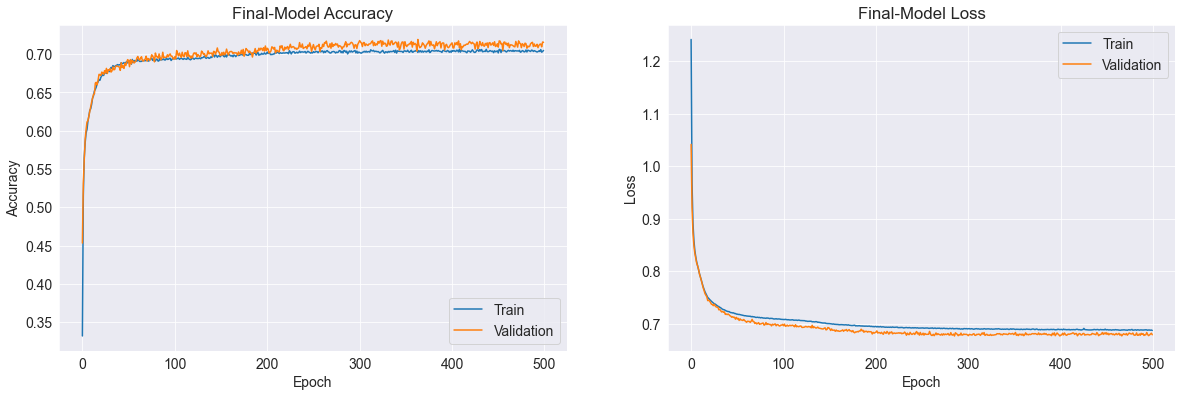

In [262]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Final-Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Final-Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'])

The training of the model is complete now let's use it on test set

In [238]:
#Getting the numpy array
test_X = testX_df.values
test_Y = testY_df.values

In [239]:
#Scaling the test input
scaled_test_X = scaler.transform(test_X)

#Predicting on test set
Y_pred = final_model.predict(scaled_test_X)

In [240]:
#Converting predictions to label
pred = list()
for i in range(len(Y_pred)):
    pred.append(np.argmax(Y_pred[i]))

#Converting one hot encoded test label to label
test = list()
for i in range(len(test_Y)):
    test.append(np.argmax(test_Y[i]))

In [241]:
#Printing the Accuracy score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 70.18867924528301


Text(0.5, 1.0, 'Confusion Matrix')

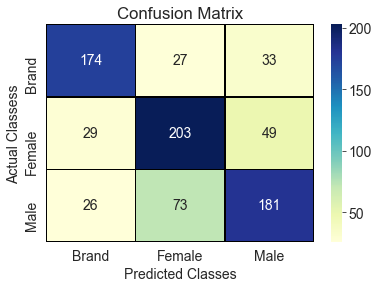

In [266]:
#Getting the confusion matrix of test set
conf_mat = confusion_matrix(test, pred)

#Plotting the heatmap of confusion matrix
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, linewidths=.5, linecolor='black', cmap="YlGnBu", fmt='d', ax=ax,
            xticklabels=['Brand', 'Female', 'Male'], yticklabels=['Brand', 'Female', 'Male'])
ax.set_xlabel('Predicted Classes')
ax.set_ylabel('Actual Classess')
ax.set_title('Confusion Matrix')

In [260]:
#Printing Classification Report
print(classification_report(test, pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       234
           1       0.67      0.72      0.70       281
           2       0.69      0.65      0.67       280

    accuracy                           0.70       795
   macro avg       0.71      0.70      0.70       795
weighted avg       0.70      0.70      0.70       795



**We have trained the final model and also predicted using that model on our test set.<br>
So, the test set accuracy that we have got is:**
- **Accuracy: *70.188%***